In [1]:
#import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings 
filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV
# Import machine learning libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix,roc_curve, roc_auc_score,accuracy_score

In [2]:
#Read all csv files
df_Surveydata_train = pd.read_csv('Surveydata_train.csv')
df_Traveldata_train = pd.read_csv('Traveldata_train.csv')

In [3]:
# Surveydata_train_Head
df_Surveydata_train.head()

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,98800001,0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor
1,98800002,0,poor,Ordinary,excellent,poor,need improvement,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good
2,98800003,1,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent
3,98800004,0,acceptable,Ordinary,need improvement,NaN,need improvement,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable
4,98800005,1,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,good,good,good,good,good,good,good


In [4]:
# Surveydata_train_tail
df_Surveydata_train.tail()

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
94374,98894375,0,poor,Ordinary,good,good,Convinient,poor,poor,poor,poor,good,good,good,need improvement,good,poor
94375,98894376,1,good,Ordinary,good,good,Convinient,need improvement,excellent,excellent,acceptable,acceptable,acceptable,acceptable,good,acceptable,good
94376,98894377,1,need improvement,Green Car,need improvement,need improvement,need improvement,good,excellent,good,good,good,good,good,acceptable,good,acceptable
94377,98894378,0,need improvement,Ordinary,NaN,need improvement,Convinient,good,need improvement,good,good,acceptable,good,good,good,excellent,good
94378,98894379,0,acceptable,Ordinary,poor,acceptable,manageable,acceptable,acceptable,acceptable,acceptable,poor,good,good,poor,good,acceptable


In [5]:
# Travel data_train_Head
df_Traveldata_train.head()

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0


In [6]:
# Travel data_train_tail
df_Traveldata_train.tail()

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
94374,98894375,Male,Loyal Customer,32.0,Business travel,Business,1357,83.0,125.0
94375,98894376,Male,Loyal Customer,44.0,Business travel,Business,592,5.0,11.0
94376,98894377,Male,NaN,63.0,Business travel,Business,2794,0.0,0.0
94377,98894378,Male,Loyal Customer,16.0,Personal Travel,Eco,2744,0.0,0.0
94378,98894379,Male,Loyal Customer,54.0,NaN,Eco,2107,28.0,28.0


In [7]:
# shape of surveydata train
df_Surveydata_train.shape

(94379, 17)

In [8]:
# shape of traveldata train
df_Traveldata_train.shape

(94379, 9)

In [9]:
# merge Surveydata & travel data for Train and testset
df_train = pd.merge (df_Surveydata_train, df_Traveldata_train, on = 'ID' , how = 'outer')

In [10]:
# merged trainset first 5 rows
df_train.head()

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,98800001,0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,...,need improvement,poor,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,0,poor,Ordinary,excellent,poor,need improvement,good,poor,good,...,good,good,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,1,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,...,excellent,excellent,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0
3,98800004,0,acceptable,Ordinary,need improvement,NaN,need improvement,acceptable,need improvement,acceptable,...,acceptable,acceptable,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0
4,98800005,1,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,...,good,good,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0


In [11]:
# merged trainset last 5 rows
df_train.tail()

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
94374,98894375,0,poor,Ordinary,good,good,Convinient,poor,poor,poor,...,good,poor,Male,Loyal Customer,32.0,Business travel,Business,1357,83.0,125.0
94375,98894376,1,good,Ordinary,good,good,Convinient,need improvement,excellent,excellent,...,acceptable,good,Male,Loyal Customer,44.0,Business travel,Business,592,5.0,11.0
94376,98894377,1,need improvement,Green Car,need improvement,need improvement,need improvement,good,excellent,good,...,good,acceptable,Male,NaN,63.0,Business travel,Business,2794,0.0,0.0
94377,98894378,0,need improvement,Ordinary,NaN,need improvement,Convinient,good,need improvement,good,...,excellent,good,Male,Loyal Customer,16.0,Personal Travel,Eco,2744,0.0,0.0
94378,98894379,0,acceptable,Ordinary,poor,acceptable,manageable,acceptable,acceptable,acceptable,...,good,acceptable,Male,Loyal Customer,54.0,NaN,Eco,2107,28.0,28.0


In [12]:
#shape of merged train dataset
df_train.shape

(94379, 25)

In [13]:
#info of merged train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Seat_comfort             94318 non-null  object 
 3   Seat_Class               94379 non-null  object 
 4   Arrival_time_convenient  85449 non-null  object 
 5   Catering                 85638 non-null  object 
 6   Platform_location        94349 non-null  object 
 7   Onboardwifi_service      94349 non-null  object 
 8   Onboard_entertainment    94361 non-null  object 
 9   Online_support           94288 non-null  object 
 10  Onlinebooking_Ease       94306 non-null  object 
 11  Onboard_service          86778 non-null  object 
 12  Leg_room                 94289 non-null  object 
 13  Baggage_handling         94237 non-null  object 
 14  Checkin_service       

In [14]:
#five point summary of numerical features of merged train dataset
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,94379.0,9.884719e+07,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Overall_Experience,94379.0,5.466576e-01,0.497821,0.0,0.0,1.0,1.0,1.0
Age,94346.0,3.941965e+01,15.116632,7.0,27.0,40.0,51.0,85.0
Travel_Distance,94379.0,1.978888e+03,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
DepartureDelay_in_Mins,94322.0,1.464709e+01,38.138781,0.0,0.0,0.0,12.0,1592.0
ArrivalDelay_in_Mins,94022.0,1.500522e+01,38.439409,0.0,0.0,0.0,13.0,1584.0


In [15]:
#five point summary of Categorical features of merged train dataset
df_train.describe(include = ['object']).T

,count,unique,top,freq
Seat_comfort,94318,6,acceptable,21158
Seat_Class,94379,2,Green Car,47435
Arrival_time_convenient,85449,6,good,19574
Catering,85638,6,acceptable,18468
Platform_location,94349,6,manageable,24173
Onboardwifi_service,94349,6,good,22835
Onboard_entertainment,94361,6,good,30446
Online_support,94288,6,good,30016
Onlinebooking_Ease,94306,6,good,28909
Onboard_service,86778,6,good,27265


## Checking for duplicate records in the Train dataset

In [16]:
#check for duplicate
dups = df_train.duplicated()
print('Number of duplicate row = %d' %(dups.sum()))

Number of duplicate row = 0


In [17]:
df_train_num = df_train.select_dtypes(['float64','int64'])
df_train_cat = df_train.select_dtypes(['object'])

In [18]:
df_train_num.isnull().sum()

ID                          0
Overall_Experience          0
Age                        33
Travel_Distance             0
DepartureDelay_in_Mins     57
ArrivalDelay_in_Mins      357
dtype: int64

In [19]:
from sklearn.impute import SimpleImputer

In [20]:
imputer = SimpleImputer(missing_values= np.nan, strategy='median')
imr = imputer.fit(df_train_num)
df_train_num = pd.DataFrame(imr.transform(df_train_num), columns=df_train_num.columns)

In [21]:
df_train_num.isnull().sum()

ID                        0
Overall_Experience        0
Age                       0
Travel_Distance           0
DepartureDelay_in_Mins    0
ArrivalDelay_in_Mins      0
dtype: int64

In [22]:
df_train_cat.isnull().sum()

Seat_comfort                 61
Seat_Class                    0
Arrival_time_convenient    8930
Catering                   8741
Platform_location            30
Onboardwifi_service          30
Onboard_entertainment        18
Online_support               91
Onlinebooking_Ease           73
Onboard_service            7601
Leg_room                     90
Baggage_handling            142
Checkin_service              77
Cleanliness                   6
Online_boarding               6
Gender                       77
CustomerType               8951
TypeTravel                 9226
Travel_Class                  0
dtype: int64

In [23]:
df_train_cat = df_train_cat.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [24]:
df_train_cat.isnull().sum()

Seat_comfort               0
Seat_Class                 0
Arrival_time_convenient    0
Catering                   0
Platform_location          0
Onboardwifi_service        0
Onboard_entertainment      0
Online_support             0
Onlinebooking_Ease         0
Onboard_service            0
Leg_room                   0
Baggage_handling           0
Checkin_service            0
Cleanliness                0
Online_boarding            0
Gender                     0
CustomerType               0
TypeTravel                 0
Travel_Class               0
dtype: int64

In [25]:
df_train_cat.head()

,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Gender,CustomerType,TypeTravel,Travel_Class
0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor,Female,Loyal Customer,Business travel,Business
1,poor,Ordinary,excellent,poor,need improvement,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good,Male,Loyal Customer,Personal Travel,Eco
2,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent,Female,Loyal Customer,Business travel,Business
3,acceptable,Ordinary,need improvement,acceptable,need improvement,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable,Female,Loyal Customer,Business travel,Business
4,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,good,good,good,good,good,good,good,Female,Loyal Customer,Business travel,Business


In [26]:
df_train_num.head()

,ID,Overall_Experience,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,98800001.0,0.0,52.0,272.0,0.0,5.0
1,98800002.0,0.0,48.0,2200.0,9.0,0.0
2,98800003.0,1.0,43.0,1061.0,77.0,119.0
3,98800004.0,0.0,44.0,780.0,13.0,18.0
4,98800005.0,1.0,50.0,1981.0,0.0,0.0


In [27]:
from scipy.stats import zscore
df_train_num_scaled=df_train_num[['Age','Travel_Distance','DepartureDelay_in_Mins','ArrivalDelay_in_Mins']].apply(zscore)

In [28]:
df_train_num_scaled.head()

,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,0.832356,-1.660469,-0.383916,-0.259227
1,0.567699,0.215099,-0.147874,-0.389511
2,0.236878,-0.892926,1.635557,2.711265
3,0.303042,-1.166284,-0.042966,0.079514
4,0.700027,0.002054,-0.383916,-0.389511


In [29]:
df_train = pd.concat([df_train_num['Overall_Experience'],df_train_num_scaled, df_train_cat], axis = 1, join = 'inner')

In [30]:
df_train.head()

,Overall_Experience,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,...,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Gender,CustomerType,TypeTravel,Travel_Class
0,0.0,0.832356,-1.660469,-0.383916,-0.259227,need improvement,Green Car,excellent,excellent,very convinient,...,need improvement,acceptable,need improvement,good,need improvement,poor,Female,Loyal Customer,Business travel,Business
1,0.0,0.567699,0.215099,-0.147874,-0.389511,poor,Ordinary,excellent,poor,need improvement,...,excellent,need improvement,poor,need improvement,good,good,Male,Loyal Customer,Personal Travel,Eco
2,1.0,0.236878,-0.892926,1.635557,2.711265,need improvement,Green Car,need improvement,need improvement,need improvement,...,excellent,excellent,excellent,good,excellent,excellent,Female,Loyal Customer,Business travel,Business
3,0.0,0.303042,-1.166284,-0.042966,0.079514,acceptable,Ordinary,need improvement,acceptable,need improvement,...,acceptable,acceptable,acceptable,good,acceptable,acceptable,Female,Loyal Customer,Business travel,Business
4,1.0,0.700027,0.002054,-0.383916,-0.389511,acceptable,Ordinary,acceptable,acceptable,manageable,...,good,good,good,good,good,good,Female,Loyal Customer,Business travel,Business


In [31]:
df_train.shape

(94379, 24)

In [32]:
df_train['Overall_Experience'] = df_train['Overall_Experience'].astype('int64')

In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Overall_Experience       94379 non-null  int64  
 1   Age                      94379 non-null  float64
 2   Travel_Distance          94379 non-null  float64
 3   DepartureDelay_in_Mins   94379 non-null  float64
 4   ArrivalDelay_in_Mins     94379 non-null  float64
 5   Seat_comfort             94379 non-null  object 
 6   Seat_Class               94379 non-null  object 
 7   Arrival_time_convenient  94379 non-null  object 
 8   Catering                 94379 non-null  object 
 9   Platform_location        94379 non-null  object 
 10  Onboardwifi_service      94379 non-null  object 
 11  Onboard_entertainment    94379 non-null  object 
 12  Online_support           94379 non-null  object 
 13  Onlinebooking_Ease       94379 non-null  object 
 14  Onboard_service       

In [34]:
for feature in df_train.columns:
    if df_train[feature].dtype == 'object':
        print(feature)
        print(df_train[feature].value_counts())
        print('\n')     

Seat_comfort
acceptable          21219
need improvement    20946
good                20595
poor                15185
excellent           12971
extremely poor       3463
Name: Seat_comfort, dtype: int64


Seat_Class
Green Car    47435
Ordinary     46944
Name: Seat_Class, dtype: int64


Arrival_time_convenient
good                28504
excellent           17684
acceptable          15177
need improvement    14990
poor                13692
extremely poor       4332
Name: Arrival_time_convenient, dtype: int64


Catering
acceptable          27209
need improvement    17978
good                17969
poor                13858
excellent           13455
extremely poor       3910
Name: Catering, dtype: int64


Platform_location
manageable           24203
Convinient           21912
need improvement     17832
Inconvinient         16449
very convinient      13981
very inconvinient        2
Name: Platform_location, dtype: int64


Onboardwifi_service
good                22865
excellent           20968


In [35]:
df_train.columns

Index(['Overall_Experience', 'Age', 'Travel_Distance',
       'DepartureDelay_in_Mins', 'ArrivalDelay_in_Mins', 'Seat_comfort',
       'Seat_Class', 'Arrival_time_convenient', 'Catering',
       'Platform_location', 'Onboardwifi_service', 'Onboard_entertainment',
       'Online_support', 'Onlinebooking_Ease', 'Onboard_service', 'Leg_room',
       'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding',
       'Gender', 'CustomerType', 'TypeTravel', 'Travel_Class'],
      dtype='object')

In [36]:
df_train['Seat_comfort'] = np.where(df_train['Seat_comfort'] == 'extremely poor', '0',df_train['Seat_comfort'])
df_train['Seat_comfort'] = np.where(df_train['Seat_comfort'] == 'poor', '1',df_train['Seat_comfort'])
df_train['Seat_comfort'] = np.where(df_train['Seat_comfort'] == 'need improvement', '2',df_train['Seat_comfort'])
df_train['Seat_comfort'] = np.where(df_train['Seat_comfort'] == 'acceptable', '3',df_train['Seat_comfort'])
df_train['Seat_comfort'] = np.where(df_train['Seat_comfort'] == 'good', '4',df_train['Seat_comfort'])
df_train['Seat_comfort'] = np.where(df_train['Seat_comfort'] == 'excellent', '5',df_train['Seat_comfort'])

In [37]:
df_train['Seat_Class'] = np.where(df_train['Seat_Class'] == 'Ordinary', '0',df_train['Seat_Class'])
df_train['Seat_Class'] = np.where(df_train['Seat_Class'] == 'Green Car', '1',df_train['Seat_Class'])

In [38]:
df_train['Arrival_time_convenient'] = np.where(df_train['Arrival_time_convenient'] == 'extremely poor', '0',df_train['Arrival_time_convenient'])
df_train['Arrival_time_convenient'] = np.where(df_train['Arrival_time_convenient'] == 'poor', '1',df_train['Arrival_time_convenient'])
df_train['Arrival_time_convenient'] = np.where(df_train['Arrival_time_convenient'] == 'need improvement', '2',df_train['Arrival_time_convenient'])
df_train['Arrival_time_convenient'] = np.where(df_train['Arrival_time_convenient'] == 'acceptable', '3',df_train['Arrival_time_convenient'])
df_train['Arrival_time_convenient'] = np.where(df_train['Arrival_time_convenient'] == 'good', '4',df_train['Arrival_time_convenient'])
df_train['Arrival_time_convenient'] = np.where(df_train['Arrival_time_convenient'] == 'excellent', '5',df_train['Arrival_time_convenient'])

In [39]:
df_train['Catering'] = np.where(df_train['Catering'] == 'extremely poor', '0',df_train['Catering'])
df_train['Catering'] = np.where(df_train['Catering'] == 'poor', '1',df_train['Catering'])
df_train['Catering'] = np.where(df_train['Catering'] == 'need improvement', '2',df_train['Catering'])
df_train['Catering'] = np.where(df_train['Catering'] == 'acceptable', '3',df_train['Catering'])
df_train['Catering'] = np.where(df_train['Catering'] == 'good', '4',df_train['Catering'])
df_train['Catering'] = np.where(df_train['Catering'] == 'excellent', '5',df_train['Catering'])

In [40]:
df_train['Platform_location'] = np.where(df_train['Platform_location'] == 'very inconvinient', '0',df_train['Platform_location'])
df_train['Platform_location'] = np.where(df_train['Platform_location'] == 'Inconvinient', '1',df_train['Platform_location'])
df_train['Platform_location'] = np.where(df_train['Platform_location'] == 'need improvement', '2',df_train['Platform_location'])
df_train['Platform_location'] = np.where(df_train['Platform_location'] == 'manageable', '3',df_train['Platform_location'])
df_train['Platform_location'] = np.where(df_train['Platform_location'] == 'Convinient', '4',df_train['Platform_location'])
df_train['Platform_location'] = np.where(df_train['Platform_location'] == 'very convinient', '5',df_train['Platform_location'])

In [41]:
df_train['Onboardwifi_service'] = np.where(df_train['Onboardwifi_service'] == 'extremely poor', '0',df_train['Onboardwifi_service'])
df_train['Onboardwifi_service'] = np.where(df_train['Onboardwifi_service'] == 'poor', '1',df_train['Onboardwifi_service'])
df_train['Onboardwifi_service'] = np.where(df_train['Onboardwifi_service'] == 'need improvement', '2',df_train['Onboardwifi_service'])
df_train['Onboardwifi_service'] = np.where(df_train['Onboardwifi_service'] == 'acceptable', '3',df_train['Onboardwifi_service'])
df_train['Onboardwifi_service'] = np.where(df_train['Onboardwifi_service'] == 'good', '4',df_train['Onboardwifi_service'])
df_train['Onboardwifi_service'] = np.where(df_train['Onboardwifi_service'] == 'excellent', '5',df_train['Onboardwifi_service'])

In [42]:
df_train['Onboard_entertainment'] = np.where(df_train['Onboard_entertainment'] == 'extremely poor', '0',df_train['Onboard_entertainment'])
df_train['Onboard_entertainment'] = np.where(df_train['Onboard_entertainment'] == 'poor', '1',df_train['Onboard_entertainment'])
df_train['Onboard_entertainment'] = np.where(df_train['Onboard_entertainment'] == 'need improvement', '2',df_train['Onboard_entertainment'])
df_train['Onboard_entertainment'] = np.where(df_train['Onboard_entertainment'] == 'acceptable', '3',df_train['Onboard_entertainment'])
df_train['Onboard_entertainment'] = np.where(df_train['Onboard_entertainment'] == 'good', '4',df_train['Onboard_entertainment'])
df_train['Onboard_entertainment'] = np.where(df_train['Onboard_entertainment'] == 'excellent', '5',df_train['Onboard_entertainment'])

In [43]:
df_train['Online_support'] = np.where(df_train['Online_support'] == 'extremely poor', '0',df_train['Online_support'])
df_train['Online_support'] = np.where(df_train['Online_support'] == 'poor', '1',df_train['Online_support'])
df_train['Online_support'] = np.where(df_train['Online_support'] == 'need improvement', '2',df_train['Online_support'])
df_train['Online_support'] = np.where(df_train['Online_support'] == 'acceptable', '3',df_train['Online_support'])
df_train['Online_support'] = np.where(df_train['Online_support'] == 'good', '4',df_train['Online_support'])
df_train['Online_support'] = np.where(df_train['Online_support'] == 'excellent', '5',df_train['Online_support'])

In [44]:
df_train['Onlinebooking_Ease'] = np.where(df_train['Onlinebooking_Ease'] == 'extremely poor', '0',df_train['Onlinebooking_Ease'])
df_train['Onlinebooking_Ease'] = np.where(df_train['Onlinebooking_Ease'] == 'poor', '1',df_train['Onlinebooking_Ease'])
df_train['Onlinebooking_Ease'] = np.where(df_train['Onlinebooking_Ease'] == 'need improvement', '2',df_train['Onlinebooking_Ease'])
df_train['Onlinebooking_Ease'] = np.where(df_train['Onlinebooking_Ease'] == 'acceptable', '3',df_train['Onlinebooking_Ease'])
df_train['Onlinebooking_Ease'] = np.where(df_train['Onlinebooking_Ease'] == 'good', '4',df_train['Onlinebooking_Ease'])
df_train['Onlinebooking_Ease'] = np.where(df_train['Onlinebooking_Ease'] == 'excellent', '5',df_train['Onlinebooking_Ease'])

In [45]:
df_train['Onboard_service'] = np.where(df_train['Onboard_service'] == 'extremely poor', '0',df_train['Onboard_service'])
df_train['Onboard_service'] = np.where(df_train['Onboard_service'] == 'poor', '1',df_train['Onboard_service'])
df_train['Onboard_service'] = np.where(df_train['Onboard_service'] == 'need improvement', '2',df_train['Onboard_service'])
df_train['Onboard_service'] = np.where(df_train['Onboard_service'] == 'acceptable', '3',df_train['Onboard_service'])
df_train['Onboard_service'] = np.where(df_train['Onboard_service'] == 'good', '4',df_train['Onboard_service'])
df_train['Onboard_service'] = np.where(df_train['Onboard_service'] == 'excellent', '5',df_train['Onboard_service'])

In [46]:
df_train['Leg_room'] = np.where(df_train['Leg_room'] == 'extremely poor', '0',df_train['Leg_room'])
df_train['Leg_room'] = np.where(df_train['Leg_room'] == 'poor', '1',df_train['Leg_room'])
df_train['Leg_room'] = np.where(df_train['Leg_room'] == 'need improvement', '2',df_train['Leg_room'])
df_train['Leg_room'] = np.where(df_train['Leg_room'] == 'acceptable', '3',df_train['Leg_room'])
df_train['Leg_room'] = np.where(df_train['Leg_room'] == 'good', '4',df_train['Leg_room'])
df_train['Leg_room'] = np.where(df_train['Leg_room'] == 'excellent', '5',df_train['Leg_room'])

In [47]:
df_train['Baggage_handling'] = np.where(df_train['Baggage_handling'] == 'extremely poor', '0',df_train['Baggage_handling'])
df_train['Baggage_handling'] = np.where(df_train['Baggage_handling'] == 'poor', '1',df_train['Baggage_handling'])
df_train['Baggage_handling'] = np.where(df_train['Baggage_handling'] == 'need improvement', '2',df_train['Baggage_handling'])
df_train['Baggage_handling'] = np.where(df_train['Baggage_handling'] == 'acceptable', '3',df_train['Baggage_handling'])
df_train['Baggage_handling'] = np.where(df_train['Baggage_handling'] == 'good', '4',df_train['Baggage_handling'])
df_train['Baggage_handling'] = np.where(df_train['Baggage_handling'] == 'excellent', '5',df_train['Baggage_handling'])

In [48]:
df_train['Checkin_service'] = np.where(df_train['Checkin_service'] == 'extremely poor', '0',df_train['Checkin_service'])
df_train['Checkin_service'] = np.where(df_train['Checkin_service'] == 'poor', '1',df_train['Checkin_service'])
df_train['Checkin_service'] = np.where(df_train['Checkin_service'] == 'need improvement', '2',df_train['Checkin_service'])
df_train['Checkin_service'] = np.where(df_train['Checkin_service'] == 'acceptable', '3',df_train['Checkin_service'])
df_train['Checkin_service'] = np.where(df_train['Checkin_service'] == 'good', '4',df_train['Checkin_service'])
df_train['Checkin_service'] = np.where(df_train['Checkin_service'] == 'excellent', '5',df_train['Checkin_service'])

In [49]:
df_train['Cleanliness'] = np.where(df_train['Cleanliness'] == 'extremely poor', '0',df_train['Cleanliness'])
df_train['Cleanliness'] = np.where(df_train['Cleanliness'] == 'poor', '1',df_train['Cleanliness'])
df_train['Cleanliness'] = np.where(df_train['Cleanliness'] == 'need improvement', '2',df_train['Cleanliness'])
df_train['Cleanliness'] = np.where(df_train['Cleanliness'] == 'acceptable', '3',df_train['Cleanliness'])
df_train['Cleanliness'] = np.where(df_train['Cleanliness'] == 'good', '4',df_train['Cleanliness'])
df_train['Cleanliness'] = np.where(df_train['Cleanliness'] == 'excellent', '5',df_train['Cleanliness'])

In [50]:
df_train['Online_boarding'] = np.where(df_train['Online_boarding'] == 'extremely poor', '0',df_train['Online_boarding'])
df_train['Online_boarding'] = np.where(df_train['Online_boarding'] == 'poor', '1',df_train['Online_boarding'])
df_train['Online_boarding'] = np.where(df_train['Online_boarding'] == 'need improvement', '2',df_train['Online_boarding'])
df_train['Online_boarding'] = np.where(df_train['Online_boarding'] == 'acceptable', '3',df_train['Online_boarding'])
df_train['Online_boarding'] = np.where(df_train['Online_boarding'] == 'good', '4',df_train['Online_boarding'])
df_train['Online_boarding'] = np.where(df_train['Online_boarding'] == 'excellent', '5',df_train['Online_boarding'])

In [51]:
df_train['CustomerType'] = np.where(df_train['CustomerType'] == 'disloyal Customer', '0',df_train['CustomerType'])
df_train['CustomerType'] = np.where(df_train['CustomerType'] == 'Loyal Customer', '1',df_train['CustomerType'])

In [52]:
df_train['Travel_Class'] = np.where(df_train['Travel_Class'] == 'Eco', '0',df_train['Travel_Class'])
df_train['Travel_Class'] = np.where(df_train['Travel_Class'] == 'Business', '1',df_train['Travel_Class'])

In [53]:
df_train['TypeTravel'] = np.where(df_train['TypeTravel'] == 'Personal Travel', '0',df_train['TypeTravel'])
df_train['TypeTravel'] = np.where(df_train['TypeTravel'] == 'Business travel', '1',df_train['TypeTravel'])

In [54]:
df_train['Gender'] = np.where(df_train['Gender'] == 'Female', '0',df_train['Gender'])
df_train['Gender'] = np.where(df_train['Gender'] == 'Male', '1',df_train['Gender'])

In [55]:
df_train['Seat_comfort'] = df_train['Seat_comfort'].astype('int64')
df_train['Seat_Class'] = df_train['Seat_Class'].astype('int64')
df_train['Arrival_time_convenient'] = df_train['Arrival_time_convenient'].astype('int64')
df_train['Catering'] = df_train['Catering'].astype('int64')
df_train['Platform_location'] = df_train['Platform_location'].astype('int64')
df_train['Onboardwifi_service'] = df_train['Onboardwifi_service'].astype('int64')
df_train['Onboard_entertainment'] = df_train['Onboard_entertainment'].astype('int64')
df_train['Online_support'] = df_train['Online_support'].astype('int64')
df_train['Onlinebooking_Ease'] = df_train['Onlinebooking_Ease'].astype('int64')
df_train['Onboard_service'] = df_train['Onboard_service'].astype('int64')
df_train['Leg_room'] = df_train['Leg_room'].astype('int64')
df_train['Baggage_handling'] = df_train['Baggage_handling'].astype('int64')
df_train['Checkin_service'] = df_train['Checkin_service'].astype('int64')
df_train['Cleanliness'] = df_train['Cleanliness'].astype('int64')
df_train['Online_boarding'] = df_train['Online_boarding'].astype('int64')
df_train['Gender'] = df_train['Gender'].astype('int64')
df_train['CustomerType'] = df_train['CustomerType'].astype('int64')
df_train['TypeTravel'] = df_train['TypeTravel'].astype('int64')
df_train['Travel_Class'] = df_train['Travel_Class'].astype('int64')

In [56]:
df_train.shape

(94379, 24)

In [57]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Overall_Experience       94379 non-null  int64  
 1   Age                      94379 non-null  float64
 2   Travel_Distance          94379 non-null  float64
 3   DepartureDelay_in_Mins   94379 non-null  float64
 4   ArrivalDelay_in_Mins     94379 non-null  float64
 5   Seat_comfort             94379 non-null  int64  
 6   Seat_Class               94379 non-null  int64  
 7   Arrival_time_convenient  94379 non-null  int64  
 8   Catering                 94379 non-null  int64  
 9   Platform_location        94379 non-null  int64  
 10  Onboardwifi_service      94379 non-null  int64  
 11  Onboard_entertainment    94379 non-null  int64  
 12  Online_support           94379 non-null  int64  
 13  Onlinebooking_Ease       94379 non-null  int64  
 14  Onboard_service       

In [58]:
df_train.isnull().sum()

Overall_Experience         0
Age                        0
Travel_Distance            0
DepartureDelay_in_Mins     0
ArrivalDelay_in_Mins       0
Seat_comfort               0
Seat_Class                 0
Arrival_time_convenient    0
Catering                   0
Platform_location          0
Onboardwifi_service        0
Onboard_entertainment      0
Online_support             0
Onlinebooking_Ease         0
Onboard_service            0
Leg_room                   0
Baggage_handling           0
Checkin_service            0
Cleanliness                0
Online_boarding            0
Gender                     0
CustomerType               0
TypeTravel                 0
Travel_Class               0
dtype: int64

In [59]:
df_train.head()

,Overall_Experience,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,...,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Gender,CustomerType,TypeTravel,Travel_Class
0,0,0.832356,-1.660469,-0.383916,-0.259227,2,1,5,5,5,...,2,3,2,4,2,1,0,1,1,1
1,0,0.567699,0.215099,-0.147874,-0.389511,1,0,5,1,2,...,5,2,1,2,4,4,1,1,0,0
2,1,0.236878,-0.892926,1.635557,2.711265,2,1,2,2,2,...,5,5,5,4,5,5,0,1,1,1
3,0,0.303042,-1.166284,-0.042966,0.079514,3,0,2,3,2,...,3,3,3,4,3,3,0,1,1,1
4,1,0.700027,0.002054,-0.383916,-0.389511,3,0,3,3,3,...,4,4,4,4,4,4,0,1,1,1


In [60]:
df_train.tail()

,Overall_Experience,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,...,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Gender,CustomerType,TypeTravel,Travel_Class
94374,0,-0.490928,-0.604976,1.792918,2.867606,1,0,4,4,4,...,4,4,4,2,4,1,1,1,1,1
94375,1,0.303042,-1.349171,-0.252782,-0.102885,4,0,4,4,4,...,3,3,3,4,3,4,1,1,1,1
94376,1,1.560162,0.792945,-0.383916,-0.389511,2,1,2,2,2,...,4,4,4,3,4,3,1,1,1,1
94377,0,-1.549556,0.744304,-0.383916,-0.389511,2,0,4,2,4,...,3,4,4,4,5,4,1,1,0,0
94378,0,0.964684,0.124628,0.350438,0.340083,3,0,1,3,3,...,1,4,4,1,4,3,1,1,1,0


In [61]:
#five point summary
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall_Experience,94379.0,5.466576e-01,0.497821,0.000000,0.000000,1.000000,1.000000,1.000000
Age,94379.0,3.849002e-17,1.000005,-2.145034,-0.821749,0.038385,0.766191,3.015774
Travel_Distance,94379.0,-3.625982e-17,1.000005,-1.876431,-0.603030,-0.054368,0.543907,4.836894
DepartureDelay_in_Mins,94379.0,-3.658434e-17,1.000005,-0.383916,-0.383916,-0.383916,-0.069193,41.369345
ArrivalDelay_in_Mins,94379.0,-8.125124e-16,1.000005,-0.389511,-0.389511,-0.389511,-0.050771,40.884682
Seat_comfort,94379.0,2.839286e+00,1.392082,0.000000,2.000000,3.000000,4.000000,5.000000
Seat_Class,94379.0,5.026012e-01,0.499996,0.000000,0.000000,1.000000,1.000000,1.000000
Arrival_time_convenient,94379.0,3.090084e+00,1.481769,0.000000,2.000000,3.000000,4.000000,5.000000
Catering,94379.0,2.867078e+00,1.376110,0.000000,2.000000,3.000000,4.000000,5.000000
Platform_location,94379.0,2.990867e+00,1.308025,0.000000,2.000000,3.000000,4.000000,5.000000


# Test dataset

In [62]:
#Read all csv files
df_Surveydata_test = pd.read_csv('Surveydata_test.csv')
df_Traveldata_test = pd.read_csv('Traveldata_test.csv')

In [63]:
# Surveydata_test_head
df_Surveydata_test.head()

,ID,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,99900001,acceptable,Green Car,acceptable,acceptable,manageable,need improvement,excellent,good,excellent,excellent,excellent,excellent,good,excellent,poor
1,99900002,extremely poor,Ordinary,good,poor,manageable,acceptable,poor,acceptable,acceptable,excellent,acceptable,good,acceptable,excellent,acceptable
2,99900003,excellent,Ordinary,excellent,excellent,very convinient,excellent,excellent,excellent,need improvement,need improvement,need improvement,need improvement,good,need improvement,excellent
3,99900004,acceptable,Green Car,excellent,acceptable,very convinient,poor,acceptable,excellent,poor,acceptable,need improvement,excellent,excellent,excellent,poor
4,99900005,excellent,Ordinary,extremely poor,excellent,need improvement,excellent,excellent,excellent,excellent,NaN,acceptable,excellent,excellent,excellent,excellent


In [64]:
# Surveydata_test_tail
df_Surveydata_test.tail()

,ID,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
35597,99935598,need improvement,Green Car,excellent,need improvement,manageable,acceptable,need improvement,acceptable,acceptable,good,excellent,good,acceptable,good,acceptable
35598,99935599,need improvement,Ordinary,need improvement,good,need improvement,acceptable,excellent,excellent,good,good,good,good,acceptable,good,good
35599,99935600,good,Green Car,extremely poor,good,need improvement,need improvement,good,poor,need improvement,poor,acceptable,poor,poor,excellent,need improvement
35600,99935601,excellent,Ordinary,excellent,excellent,Inconvinient,acceptable,excellent,good,excellent,excellent,excellent,excellent,acceptable,excellent,good
35601,99935602,good,Ordinary,acceptable,good,manageable,poor,good,poor,poor,acceptable,good,good,need improvement,good,poor


In [65]:
# Travel data_test_Head
df_Traveldata_test.head()

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,99900001,Female,NaN,36.0,Business travel,Business,532,0.0,0.0
1,99900002,Female,disloyal Customer,21.0,Business travel,Business,1425,9.0,28.0
2,99900003,Male,Loyal Customer,60.0,Business travel,Business,2832,0.0,0.0
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0
4,99900005,Male,disloyal Customer,18.0,Business travel,Business,1610,17.0,0.0


In [66]:
# Travel data_test_tail
df_Traveldata_test.tail()

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
35597,99935598,Male,Loyal Customer,8.0,Personal Travel,Eco,1334,0.0,0.0
35598,99935599,Female,Loyal Customer,53.0,Business travel,Business,1772,0.0,0.0
35599,99935600,Male,disloyal Customer,22.0,Business travel,Eco,1180,0.0,0.0
35600,99935601,Female,Loyal Customer,67.0,Personal Travel,Eco,420,23.0,16.0
35601,99935602,Male,NaN,20.0,Personal Travel,Eco,1680,0.0,0.0


In [67]:
# shape of surveydata test
df_Surveydata_test.shape

(35602, 16)

In [68]:
# shape of traveldata test
df_Traveldata_test.shape

(35602, 9)

In [69]:
# merge Surveydata & travel data for Train and testset
df_test = pd.merge (df_Surveydata_test, df_Traveldata_test, on = 'ID' , how = 'outer')

In [70]:
# merged testset first 5 rows
df_test.head()

,ID,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,99900001,acceptable,Green Car,acceptable,acceptable,manageable,need improvement,excellent,good,excellent,...,excellent,poor,Female,NaN,36.0,Business travel,Business,532,0.0,0.0
1,99900002,extremely poor,Ordinary,good,poor,manageable,acceptable,poor,acceptable,acceptable,...,excellent,acceptable,Female,disloyal Customer,21.0,Business travel,Business,1425,9.0,28.0
2,99900003,excellent,Ordinary,excellent,excellent,very convinient,excellent,excellent,excellent,need improvement,...,need improvement,excellent,Male,Loyal Customer,60.0,Business travel,Business,2832,0.0,0.0
3,99900004,acceptable,Green Car,excellent,acceptable,very convinient,poor,acceptable,excellent,poor,...,excellent,poor,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0
4,99900005,excellent,Ordinary,extremely poor,excellent,need improvement,excellent,excellent,excellent,excellent,...,excellent,excellent,Male,disloyal Customer,18.0,Business travel,Business,1610,17.0,0.0


In [71]:
# merged testset last 5 rows
df_test.tail()

,ID,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
35597,99935598,need improvement,Green Car,excellent,need improvement,manageable,acceptable,need improvement,acceptable,acceptable,...,good,acceptable,Male,Loyal Customer,8.0,Personal Travel,Eco,1334,0.0,0.0
35598,99935599,need improvement,Ordinary,need improvement,good,need improvement,acceptable,excellent,excellent,good,...,good,good,Female,Loyal Customer,53.0,Business travel,Business,1772,0.0,0.0
35599,99935600,good,Green Car,extremely poor,good,need improvement,need improvement,good,poor,need improvement,...,excellent,need improvement,Male,disloyal Customer,22.0,Business travel,Eco,1180,0.0,0.0
35600,99935601,excellent,Ordinary,excellent,excellent,Inconvinient,acceptable,excellent,good,excellent,...,excellent,good,Female,Loyal Customer,67.0,Personal Travel,Eco,420,23.0,16.0
35601,99935602,good,Ordinary,acceptable,good,manageable,poor,good,poor,poor,...,good,poor,Male,NaN,20.0,Personal Travel,Eco,1680,0.0,0.0


In [72]:
#shape of merged test dataset
df_test.shape

(35602, 24)

In [73]:
#info of merged test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Seat_comfort             35580 non-null  object 
 2   Seat_Class               35602 non-null  object 
 3   Arrival_time_convenient  32277 non-null  object 
 4   Catering                 32245 non-null  object 
 5   Platform_location        35590 non-null  object 
 6   Onboardwifi_service      35590 non-null  object 
 7   Onboard_entertainment    35594 non-null  object 
 8   Online_support           35576 non-null  object 
 9   Onlinebooking_Ease       35584 non-null  object 
 10  Onboard_service          32730 non-null  object 
 11  Leg_room                 35577 non-null  object 
 12  Baggage_handling         35562 non-null  object 
 13  Checkin_service          35580 non-null  object 
 14  Cleanliness           

In [74]:
#five point summary of numerical features of merged test dataset
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,35602.0,9.991780e+07,10277.556478,99900001.0,99908901.25,99917801.5,99926701.75,99935602.0
Age,35591.0,3.944700e+01,15.137554,7.0,27.00,40.0,51.00,85.0
Travel_Distance,35602.0,1.987152e+03,1024.308863,50.0,1360.00,1929.0,2559.00,6868.0
DepartureDelay_in_Mins,35573.0,1.488070e+01,37.895453,0.0,0.00,0.0,13.00,978.0
ArrivalDelay_in_Mins,35479.0,1.530880e+01,38.531293,0.0,0.00,0.0,13.00,970.0


In [75]:
#five point summary of Categorical features of merged test dataset
df_test.describe(include = ['object']).T

,count,unique,top,freq
Seat_comfort,35580,6,acceptable,8003
Seat_Class,35602,2,Ordinary,17860
Arrival_time_convenient,32277,6,good,7361
Catering,32245,6,acceptable,7133
Platform_location,35590,5,manageable,9364
Onboardwifi_service,35590,6,good,8743
Onboard_entertainment,35594,6,good,11436
Online_support,35576,5,good,11487
Onlinebooking_Ease,35584,6,good,11025
Onboard_service,32730,5,good,10222


## Checking for duplicate records in the Test dataset

In [76]:
#check for duplicate
dups = df_test.duplicated()
print('Number of duplicate row = %d' %(dups.sum()))

Number of duplicate row = 0


In [77]:
df_test_num = df_test.select_dtypes(['float64','int64'])
df_test_cat = df_test.select_dtypes(['object'])

In [78]:
df_test_num.isnull().sum()

ID                          0
Age                        11
Travel_Distance             0
DepartureDelay_in_Mins     29
ArrivalDelay_in_Mins      123
dtype: int64

In [79]:
imputer = SimpleImputer(missing_values= np.nan, strategy='median')
imr = imputer.fit(df_test_num)
df_test_num = pd.DataFrame(imr.transform(df_test_num), columns=df_test_num.columns)

In [80]:
df_test_num.isnull().sum()

ID                        0
Age                       0
Travel_Distance           0
DepartureDelay_in_Mins    0
ArrivalDelay_in_Mins      0
dtype: int64

In [81]:
df_test_cat.isnull().sum()

Seat_comfort                 22
Seat_Class                    0
Arrival_time_convenient    3325
Catering                   3357
Platform_location            12
Onboardwifi_service          12
Onboard_entertainment         8
Online_support               26
Onlinebooking_Ease           18
Onboard_service            2872
Leg_room                     25
Baggage_handling             40
Checkin_service              22
Cleanliness                   2
Online_boarding               2
Gender                       30
CustomerType               3383
TypeTravel                 3448
Travel_Class                  0
dtype: int64

In [82]:
df_test_cat = df_test_cat.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [83]:
df_test_cat.isnull().sum()

Seat_comfort               0
Seat_Class                 0
Arrival_time_convenient    0
Catering                   0
Platform_location          0
Onboardwifi_service        0
Onboard_entertainment      0
Online_support             0
Onlinebooking_Ease         0
Onboard_service            0
Leg_room                   0
Baggage_handling           0
Checkin_service            0
Cleanliness                0
Online_boarding            0
Gender                     0
CustomerType               0
TypeTravel                 0
Travel_Class               0
dtype: int64

In [84]:
df_test_cat.head()

,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Gender,CustomerType,TypeTravel,Travel_Class
0,acceptable,Green Car,acceptable,acceptable,manageable,need improvement,excellent,good,excellent,excellent,excellent,excellent,good,excellent,poor,Female,Loyal Customer,Business travel,Business
1,extremely poor,Ordinary,good,poor,manageable,acceptable,poor,acceptable,acceptable,excellent,acceptable,good,acceptable,excellent,acceptable,Female,disloyal Customer,Business travel,Business
2,excellent,Ordinary,excellent,excellent,very convinient,excellent,excellent,excellent,need improvement,need improvement,need improvement,need improvement,good,need improvement,excellent,Male,Loyal Customer,Business travel,Business
3,acceptable,Green Car,excellent,acceptable,very convinient,poor,acceptable,excellent,poor,acceptable,need improvement,excellent,excellent,excellent,poor,Female,Loyal Customer,Personal Travel,Eco
4,excellent,Ordinary,extremely poor,excellent,need improvement,excellent,excellent,excellent,excellent,good,acceptable,excellent,excellent,excellent,excellent,Male,disloyal Customer,Business travel,Business


In [85]:
df_test_num.head()

,ID,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,99900001.0,36.0,532.0,0.0,0.0
1,99900002.0,21.0,1425.0,9.0,28.0
2,99900003.0,60.0,2832.0,0.0,0.0
3,99900004.0,29.0,1352.0,0.0,0.0
4,99900005.0,18.0,1610.0,17.0,0.0


In [86]:
df_test_num_scaled=df_test_num[['Age','Travel_Distance','DepartureDelay_in_Mins','ArrivalDelay_in_Mins']].apply(zscore)

In [87]:
df_test_num_scaled.head()

,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,-0.227761,-1.420638,-0.392499,-0.396519
1,-1.218841,-0.548819,-0.154918,0.331234
2,1.357967,0.824810,-0.392499,-0.396519
3,-0.690265,-0.620087,-0.392499,-0.396519
4,-1.417057,-0.368206,0.056265,-0.396519


In [88]:
df_test = pd.concat([df_test_num_scaled, df_test_cat], axis = 1, join = 'inner')

In [89]:
df_test.head()

,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,...,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Gender,CustomerType,TypeTravel,Travel_Class
0,-0.227761,-1.420638,-0.392499,-0.396519,acceptable,Green Car,acceptable,acceptable,manageable,need improvement,...,excellent,excellent,excellent,good,excellent,poor,Female,Loyal Customer,Business travel,Business
1,-1.218841,-0.548819,-0.154918,0.331234,extremely poor,Ordinary,good,poor,manageable,acceptable,...,excellent,acceptable,good,acceptable,excellent,acceptable,Female,disloyal Customer,Business travel,Business
2,1.357967,0.824810,-0.392499,-0.396519,excellent,Ordinary,excellent,excellent,very convinient,excellent,...,need improvement,need improvement,need improvement,good,need improvement,excellent,Male,Loyal Customer,Business travel,Business
3,-0.690265,-0.620087,-0.392499,-0.396519,acceptable,Green Car,excellent,acceptable,very convinient,poor,...,acceptable,need improvement,excellent,excellent,excellent,poor,Female,Loyal Customer,Personal Travel,Eco
4,-1.417057,-0.368206,0.056265,-0.396519,excellent,Ordinary,extremely poor,excellent,need improvement,excellent,...,good,acceptable,excellent,excellent,excellent,excellent,Male,disloyal Customer,Business travel,Business


In [90]:
df_test.shape

(35602, 23)

In [91]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      35602 non-null  float64
 1   Travel_Distance          35602 non-null  float64
 2   DepartureDelay_in_Mins   35602 non-null  float64
 3   ArrivalDelay_in_Mins     35602 non-null  float64
 4   Seat_comfort             35602 non-null  object 
 5   Seat_Class               35602 non-null  object 
 6   Arrival_time_convenient  35602 non-null  object 
 7   Catering                 35602 non-null  object 
 8   Platform_location        35602 non-null  object 
 9   Onboardwifi_service      35602 non-null  object 
 10  Onboard_entertainment    35602 non-null  object 
 11  Online_support           35602 non-null  object 
 12  Onlinebooking_Ease       35602 non-null  object 
 13  Onboard_service          35602 non-null  object 
 14  Leg_room              

In [92]:
for feature in df_test.columns:
    if df_test[feature].dtype == 'object':
        print(feature)
        print(df_test[feature].value_counts())
        print('\n') 

Seat_comfort
acceptable          8025
need improvement    7831
good                7808
poor                5755
excellent           4854
extremely poor      1329
Name: Seat_comfort, dtype: int64


Seat_Class
Ordinary     17860
Green Car    17742
Name: Seat_Class, dtype: int64


Arrival_time_convenient
good                10686
excellent            6589
acceptable           5844
need improvement     5684
poor                 5131
extremely poor       1668
Name: Arrival_time_convenient, dtype: int64


Catering
acceptable          10490
need improvement     6701
good                 6701
poor                 5178
excellent            5025
extremely poor       1507
Name: Catering, dtype: int64


Platform_location
manageable          9376
Convinient          8178
need improvement    6703
Inconvinient        6134
very convinient     5211
Name: Platform_location, dtype: int64


Onboardwifi_service
good                8755
excellent           7875
acceptable          7495
need improvement    

In [93]:
df_test.columns

Index(['Age', 'Travel_Distance', 'DepartureDelay_in_Mins',
       'ArrivalDelay_in_Mins', 'Seat_comfort', 'Seat_Class',
       'Arrival_time_convenient', 'Catering', 'Platform_location',
       'Onboardwifi_service', 'Onboard_entertainment', 'Online_support',
       'Onlinebooking_Ease', 'Onboard_service', 'Leg_room', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding', 'Gender',
       'CustomerType', 'TypeTravel', 'Travel_Class'],
      dtype='object')

In [94]:
df_test['Seat_comfort'] = np.where(df_test['Seat_comfort'] == 'extremely poor', '0',df_test['Seat_comfort'])
df_test['Seat_comfort'] = np.where(df_test['Seat_comfort'] == 'poor', '1',df_test['Seat_comfort'])
df_test['Seat_comfort'] = np.where(df_test['Seat_comfort'] == 'need improvement', '2',df_test['Seat_comfort'])
df_test['Seat_comfort'] = np.where(df_test['Seat_comfort'] == 'acceptable', '3',df_test['Seat_comfort'])
df_test['Seat_comfort'] = np.where(df_test['Seat_comfort'] == 'good', '4',df_test['Seat_comfort'])
df_test['Seat_comfort'] = np.where(df_test['Seat_comfort'] == 'excellent', '5',df_test['Seat_comfort'])

In [95]:
df_test['Seat_Class'] = np.where(df_test['Seat_Class'] == 'Ordinary', '0',df_test['Seat_Class'])
df_test['Seat_Class'] = np.where(df_test['Seat_Class'] == 'Green Car', '1',df_test['Seat_Class'])

In [96]:
df_test['Arrival_time_convenient'] = np.where(df_test['Arrival_time_convenient'] == 'extremely poor', '0',df_test['Arrival_time_convenient'])
df_test['Arrival_time_convenient'] = np.where(df_test['Arrival_time_convenient'] == 'poor', '1',df_test['Arrival_time_convenient'])
df_test['Arrival_time_convenient'] = np.where(df_test['Arrival_time_convenient'] == 'need improvement', '2',df_test['Arrival_time_convenient'])
df_test['Arrival_time_convenient'] = np.where(df_test['Arrival_time_convenient'] == 'acceptable', '3',df_test['Arrival_time_convenient'])
df_test['Arrival_time_convenient'] = np.where(df_test['Arrival_time_convenient'] == 'good', '4',df_test['Arrival_time_convenient'])
df_test['Arrival_time_convenient'] = np.where(df_test['Arrival_time_convenient'] == 'excellent', '5',df_test['Arrival_time_convenient'])

In [97]:
df_test['Catering'] = np.where(df_test['Catering'] == 'extremely poor', '0',df_test['Catering'])
df_test['Catering'] = np.where(df_test['Catering'] == 'poor', '1',df_test['Catering'])
df_test['Catering'] = np.where(df_test['Catering'] == 'need improvement', '2',df_test['Catering'])
df_test['Catering'] = np.where(df_test['Catering'] == 'acceptable', '3',df_test['Catering'])
df_test['Catering'] = np.where(df_test['Catering'] == 'good', '4',df_test['Catering'])
df_test['Catering'] = np.where(df_test['Catering'] == 'excellent', '5',df_test['Catering'])

In [98]:
df_test['Platform_location'] = np.where(df_test['Platform_location'] == 'very inconvinient', '0',df_test['Platform_location'])
df_test['Platform_location'] = np.where(df_test['Platform_location'] == 'Inconvinient', '1',df_test['Platform_location'])
df_test['Platform_location'] = np.where(df_test['Platform_location'] == 'need improvement', '2',df_test['Platform_location'])
df_test['Platform_location'] = np.where(df_test['Platform_location'] == 'manageable', '3',df_test['Platform_location'])
df_test['Platform_location'] = np.where(df_test['Platform_location'] == 'Convinient', '4',df_test['Platform_location'])
df_test['Platform_location'] = np.where(df_test['Platform_location'] == 'very convinient', '5',df_test['Platform_location'])

In [99]:
df_test['Onboardwifi_service'] = np.where(df_test['Onboardwifi_service'] == 'extremely poor', '0',df_test['Onboardwifi_service'])
df_test['Onboardwifi_service'] = np.where(df_test['Onboardwifi_service'] == 'poor', '1',df_test['Onboardwifi_service'])
df_test['Onboardwifi_service'] = np.where(df_test['Onboardwifi_service'] == 'need improvement', '2',df_test['Onboardwifi_service'])
df_test['Onboardwifi_service'] = np.where(df_test['Onboardwifi_service'] == 'acceptable', '3',df_test['Onboardwifi_service'])
df_test['Onboardwifi_service'] = np.where(df_test['Onboardwifi_service'] == 'good', '4',df_test['Onboardwifi_service'])
df_test['Onboardwifi_service'] = np.where(df_test['Onboardwifi_service'] == 'excellent', '5',df_test['Onboardwifi_service'])

In [100]:
df_test['Onboard_entertainment'] = np.where(df_test['Onboard_entertainment'] == 'extremely poor', '0',df_test['Onboard_entertainment'])
df_test['Onboard_entertainment'] = np.where(df_test['Onboard_entertainment'] == 'poor', '1',df_test['Onboard_entertainment'])
df_test['Onboard_entertainment'] = np.where(df_test['Onboard_entertainment'] == 'need improvement', '2',df_test['Onboard_entertainment'])
df_test['Onboard_entertainment'] = np.where(df_test['Onboard_entertainment'] == 'acceptable', '3',df_test['Onboard_entertainment'])
df_test['Onboard_entertainment'] = np.where(df_test['Onboard_entertainment'] == 'good', '4',df_test['Onboard_entertainment'])
df_test['Onboard_entertainment'] = np.where(df_test['Onboard_entertainment'] == 'excellent', '5',df_test['Onboard_entertainment'])

In [101]:
df_test['Online_support'] = np.where(df_test['Online_support'] == 'extremely poor', '0',df_test['Online_support'])
df_test['Online_support'] = np.where(df_test['Online_support'] == 'poor', '1',df_test['Online_support'])
df_test['Online_support'] = np.where(df_test['Online_support'] == 'need improvement', '2',df_test['Online_support'])
df_test['Online_support'] = np.where(df_test['Online_support'] == 'acceptable', '3',df_test['Online_support'])
df_test['Online_support'] = np.where(df_test['Online_support'] == 'good', '4',df_test['Online_support'])
df_test['Online_support'] = np.where(df_test['Online_support'] == 'excellent', '5',df_test['Online_support'])

In [102]:
df_test['Onlinebooking_Ease'] = np.where(df_test['Onlinebooking_Ease'] == 'extremely poor', '0',df_test['Onlinebooking_Ease'])
df_test['Onlinebooking_Ease'] = np.where(df_test['Onlinebooking_Ease'] == 'poor', '1',df_test['Onlinebooking_Ease'])
df_test['Onlinebooking_Ease'] = np.where(df_test['Onlinebooking_Ease'] == 'need improvement', '2',df_test['Onlinebooking_Ease'])
df_test['Onlinebooking_Ease'] = np.where(df_test['Onlinebooking_Ease'] == 'acceptable', '3',df_test['Onlinebooking_Ease'])
df_test['Onlinebooking_Ease'] = np.where(df_test['Onlinebooking_Ease'] == 'good', '4',df_test['Onlinebooking_Ease'])
df_test['Onlinebooking_Ease'] = np.where(df_test['Onlinebooking_Ease'] == 'excellent', '5',df_test['Onlinebooking_Ease'])

In [103]:
df_test['Onboard_service'] = np.where(df_test['Onboard_service'] == 'extremely poor', '0',df_test['Onboard_service'])
df_test['Onboard_service'] = np.where(df_test['Onboard_service'] == 'poor', '1',df_test['Onboard_service'])
df_test['Onboard_service'] = np.where(df_test['Onboard_service'] == 'need improvement', '2',df_test['Onboard_service'])
df_test['Onboard_service'] = np.where(df_test['Onboard_service'] == 'acceptable', '3',df_test['Onboard_service'])
df_test['Onboard_service'] = np.where(df_test['Onboard_service'] == 'good', '4',df_test['Onboard_service'])
df_test['Onboard_service'] = np.where(df_test['Onboard_service'] == 'excellent', '5',df_test['Onboard_service'])

In [104]:
df_test['Leg_room'] = np.where(df_test['Leg_room'] == 'extremely poor', '0',df_test['Leg_room'])
df_test['Leg_room'] = np.where(df_test['Leg_room'] == 'poor', '1',df_test['Leg_room'])
df_test['Leg_room'] = np.where(df_test['Leg_room'] == 'need improvement', '2',df_test['Leg_room'])
df_test['Leg_room'] = np.where(df_test['Leg_room'] == 'acceptable', '3',df_test['Leg_room'])
df_test['Leg_room'] = np.where(df_test['Leg_room'] == 'good', '4',df_test['Leg_room'])
df_test['Leg_room'] = np.where(df_test['Leg_room'] == 'excellent', '5',df_test['Leg_room'])

In [105]:
df_test['Baggage_handling'] = np.where(df_test['Baggage_handling'] == 'extremely poor', '0',df_test['Baggage_handling'])
df_test['Baggage_handling'] = np.where(df_test['Baggage_handling'] == 'poor', '1',df_test['Baggage_handling'])
df_test['Baggage_handling'] = np.where(df_test['Baggage_handling'] == 'need improvement', '2',df_test['Baggage_handling'])
df_test['Baggage_handling'] = np.where(df_test['Baggage_handling'] == 'acceptable', '3',df_test['Baggage_handling'])
df_test['Baggage_handling'] = np.where(df_test['Baggage_handling'] == 'good', '4',df_test['Baggage_handling'])
df_test['Baggage_handling'] = np.where(df_test['Baggage_handling'] == 'excellent', '5',df_test['Baggage_handling'])

In [106]:
df_test['Checkin_service'] = np.where(df_test['Checkin_service'] == 'extremely poor', '0',df_test['Checkin_service'])
df_test['Checkin_service'] = np.where(df_test['Checkin_service'] == 'poor', '1',df_test['Checkin_service'])
df_test['Checkin_service'] = np.where(df_test['Checkin_service'] == 'need improvement', '2',df_test['Checkin_service'])
df_test['Checkin_service'] = np.where(df_test['Checkin_service'] == 'acceptable', '3',df_test['Checkin_service'])
df_test['Checkin_service'] = np.where(df_test['Checkin_service'] == 'good', '4',df_test['Checkin_service'])
df_test['Checkin_service'] = np.where(df_test['Checkin_service'] == 'excellent', '5',df_test['Checkin_service'])

In [107]:
df_test['Cleanliness'] = np.where(df_test['Cleanliness'] == 'extremely poor', '0',df_test['Cleanliness'])
df_test['Cleanliness'] = np.where(df_test['Cleanliness'] == 'poor', '1',df_test['Cleanliness'])
df_test['Cleanliness'] = np.where(df_test['Cleanliness'] == 'need improvement', '2',df_test['Cleanliness'])
df_test['Cleanliness'] = np.where(df_test['Cleanliness'] == 'acceptable', '3',df_test['Cleanliness'])
df_test['Cleanliness'] = np.where(df_test['Cleanliness'] == 'good', '4',df_test['Cleanliness'])
df_test['Cleanliness'] = np.where(df_test['Cleanliness'] == 'excellent', '5',df_test['Cleanliness'])

In [108]:
df_test['Online_boarding'] = np.where(df_test['Online_boarding'] == 'extremely poor', '0',df_test['Online_boarding'])
df_test['Online_boarding'] = np.where(df_test['Online_boarding'] == 'poor', '1',df_test['Online_boarding'])
df_test['Online_boarding'] = np.where(df_test['Online_boarding'] == 'need improvement', '2',df_test['Online_boarding'])
df_test['Online_boarding'] = np.where(df_test['Online_boarding'] == 'acceptable', '3',df_test['Online_boarding'])
df_test['Online_boarding'] = np.where(df_test['Online_boarding'] == 'good', '4',df_test['Online_boarding'])
df_test['Online_boarding'] = np.where(df_test['Online_boarding'] == 'excellent', '5',df_test['Online_boarding'])

In [109]:
df_test['CustomerType'] = np.where(df_test['CustomerType'] == 'disloyal Customer', '0',df_test['CustomerType'])
df_test['CustomerType'] = np.where(df_test['CustomerType'] == 'Loyal Customer', '1',df_test['CustomerType'])

In [110]:
df_test['Travel_Class'] = np.where(df_test['Travel_Class'] == 'Eco', '0',df_test['Travel_Class'])
df_test['Travel_Class'] = np.where(df_test['Travel_Class'] == 'Business', '1',df_test['Travel_Class'])

In [111]:
df_test['TypeTravel'] = np.where(df_test['TypeTravel'] == 'Personal Travel', '0',df_test['TypeTravel'])
df_test['TypeTravel'] = np.where(df_test['TypeTravel'] == 'Business travel', '1',df_test['TypeTravel'])

In [112]:
df_test['Gender'] = np.where(df_test['Gender'] == 'Female', '0',df_test['Gender'])
df_test['Gender'] = np.where(df_test['Gender'] == 'Male', '1',df_test['Gender'])

In [113]:
df_test['Seat_comfort'] = df_test['Seat_comfort'].astype('int64')
df_test['Seat_Class'] = df_test['Seat_Class'].astype('int64')
df_test['Arrival_time_convenient'] = df_test['Arrival_time_convenient'].astype('int64')
df_test['Catering'] = df_test['Catering'].astype('int64')
df_test['Platform_location'] = df_test['Platform_location'].astype('int64')
df_test['Onboardwifi_service'] = df_test['Onboardwifi_service'].astype('int64')
df_test['Onboard_entertainment'] = df_test['Onboard_entertainment'].astype('int64')
df_test['Online_support'] = df_test['Online_support'].astype('int64')
df_test['Onlinebooking_Ease'] = df_test['Onlinebooking_Ease'].astype('int64')
df_test['Onboard_service'] = df_test['Onboard_service'].astype('int64')
df_test['Leg_room'] = df_test['Leg_room'].astype('int64')
df_test['Baggage_handling'] = df_test['Baggage_handling'].astype('int64')
df_test['Checkin_service'] = df_test['Checkin_service'].astype('int64')
df_test['Cleanliness'] = df_test['Cleanliness'].astype('int64')
df_test['Online_boarding'] = df_test['Online_boarding'].astype('int64')
df_test['Gender'] = df_test['Gender'].astype('int64')
df_test['CustomerType'] = df_test['CustomerType'].astype('int64')
df_test['TypeTravel'] = df_test['TypeTravel'].astype('int64')
df_test['Travel_Class'] = df_test['Travel_Class'].astype('int64')

In [114]:
df_test.shape

(35602, 23)

In [115]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      35602 non-null  float64
 1   Travel_Distance          35602 non-null  float64
 2   DepartureDelay_in_Mins   35602 non-null  float64
 3   ArrivalDelay_in_Mins     35602 non-null  float64
 4   Seat_comfort             35602 non-null  int64  
 5   Seat_Class               35602 non-null  int64  
 6   Arrival_time_convenient  35602 non-null  int64  
 7   Catering                 35602 non-null  int64  
 8   Platform_location        35602 non-null  int64  
 9   Onboardwifi_service      35602 non-null  int64  
 10  Onboard_entertainment    35602 non-null  int64  
 11  Online_support           35602 non-null  int64  
 12  Onlinebooking_Ease       35602 non-null  int64  
 13  Onboard_service          35602 non-null  int64  
 14  Leg_room              

In [116]:
df_test.isnull().sum()

Age                        0
Travel_Distance            0
DepartureDelay_in_Mins     0
ArrivalDelay_in_Mins       0
Seat_comfort               0
Seat_Class                 0
Arrival_time_convenient    0
Catering                   0
Platform_location          0
Onboardwifi_service        0
Onboard_entertainment      0
Online_support             0
Onlinebooking_Ease         0
Onboard_service            0
Leg_room                   0
Baggage_handling           0
Checkin_service            0
Cleanliness                0
Online_boarding            0
Gender                     0
CustomerType               0
TypeTravel                 0
Travel_Class               0
dtype: int64

## Univariate Analysis on Numerical variables

In [117]:
df_train_num = df_train.select_dtypes(include = ['int64','float64'])
listnumericcolumns = list(df_train_num.columns.values)
len(listnumericcolumns)

24

In [118]:
def univariateAnalysis_numeric (column, nbins):
    print('Description of '+ column)
    print('---------------------------------------')
    print(df_train_num[column].describe(), end = '')
    print('\n-------------------------------------')
    
    plt.figure()
    print('Distribution of '+ column)
    print('---------------------------------------')
    sns.distplot(df_train_num[column], kde = True, color = 'g')
    plt.show()
    
    plt.figure()
    print('BoxPlot of' + column)
    print('-----------------------------------------')
    sns.boxplot(df_train_num[column])
    plt.show()

Description of Overall_Experience
---------------------------------------
count    94379.000000
mean         0.546658
std          0.497821
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Overall_Experience, dtype: float64
-------------------------------------
Distribution of Overall_Experience
---------------------------------------


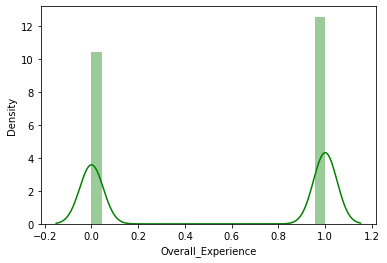

BoxPlot ofOverall_Experience
-----------------------------------------


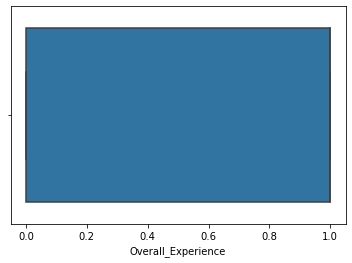

Description of Age
---------------------------------------
count    9.437900e+04
mean     3.849002e-17
std      1.000005e+00
min     -2.145034e+00
25%     -8.217495e-01
50%      3.838518e-02
75%      7.661914e-01
max      3.015774e+00
Name: Age, dtype: float64
-------------------------------------
Distribution of Age
---------------------------------------


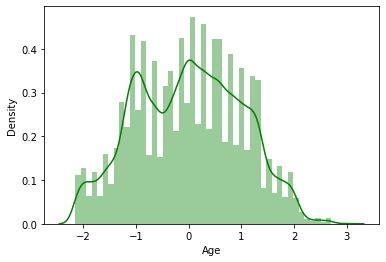

BoxPlot ofAge
-----------------------------------------


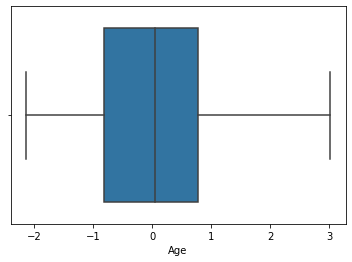

Description of Travel_Distance
---------------------------------------
count    9.437900e+04
mean    -3.625982e-17
std      1.000005e+00
min     -1.876431e+00
25%     -6.030301e-01
50%     -5.436829e-02
75%      5.439066e-01
max      4.836894e+00
Name: Travel_Distance, dtype: float64
-------------------------------------
Distribution of Travel_Distance
---------------------------------------


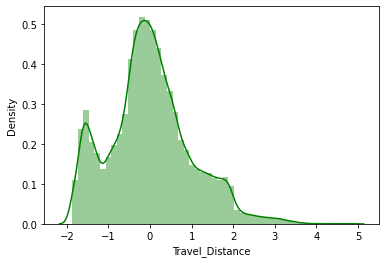

BoxPlot ofTravel_Distance
-----------------------------------------


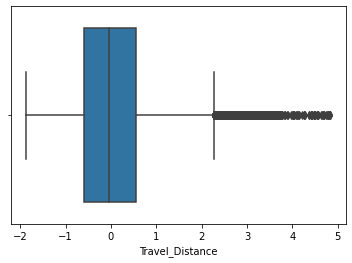

Description of DepartureDelay_in_Mins
---------------------------------------
count    9.437900e+04
mean    -3.658434e-17
std      1.000005e+00
min     -3.839161e-01
25%     -3.839161e-01
50%     -3.839161e-01
75%     -6.919307e-02
max      4.136934e+01
Name: DepartureDelay_in_Mins, dtype: float64
-------------------------------------
Distribution of DepartureDelay_in_Mins
---------------------------------------


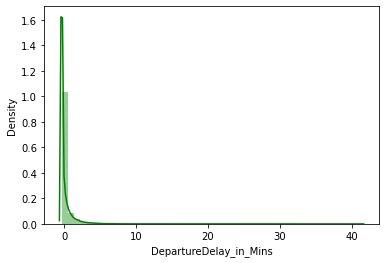

BoxPlot ofDepartureDelay_in_Mins
-----------------------------------------


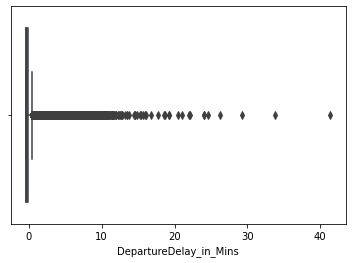

Description of ArrivalDelay_in_Mins
---------------------------------------
count    9.437900e+04
mean    -8.125124e-16
std      1.000005e+00
min     -3.895112e-01
25%     -3.895112e-01
50%     -3.895112e-01
75%     -5.077099e-02
max      4.088468e+01
Name: ArrivalDelay_in_Mins, dtype: float64
-------------------------------------
Distribution of ArrivalDelay_in_Mins
---------------------------------------


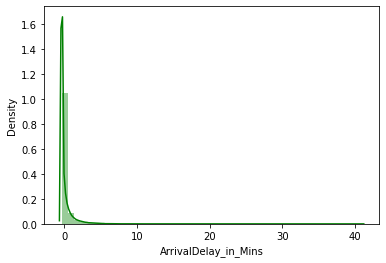

BoxPlot ofArrivalDelay_in_Mins
-----------------------------------------


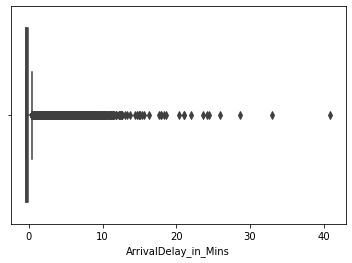

Description of Seat_comfort
---------------------------------------
count    94379.000000
mean         2.839286
std          1.392082
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Seat_comfort, dtype: float64
-------------------------------------
Distribution of Seat_comfort
---------------------------------------


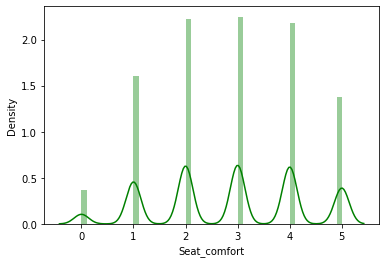

BoxPlot ofSeat_comfort
-----------------------------------------


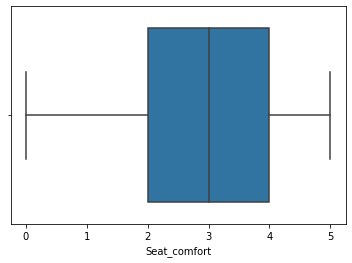

Description of Seat_Class
---------------------------------------
count    94379.000000
mean         0.502601
std          0.499996
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Seat_Class, dtype: float64
-------------------------------------
Distribution of Seat_Class
---------------------------------------


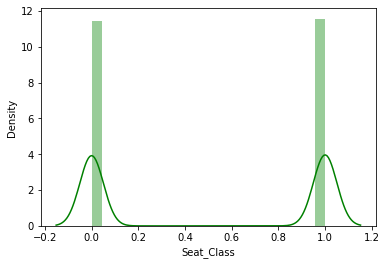

BoxPlot ofSeat_Class
-----------------------------------------


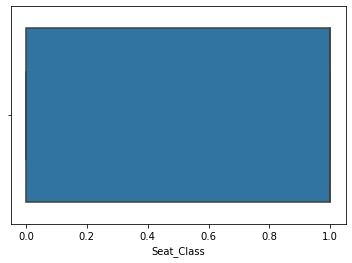

Description of Arrival_time_convenient
---------------------------------------
count    94379.000000
mean         3.090084
std          1.481769
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Arrival_time_convenient, dtype: float64
-------------------------------------
Distribution of Arrival_time_convenient
---------------------------------------


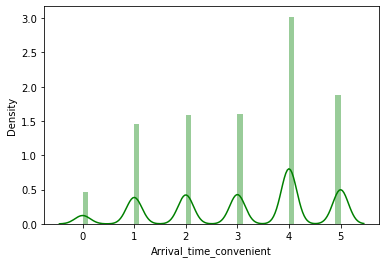

BoxPlot ofArrival_time_convenient
-----------------------------------------


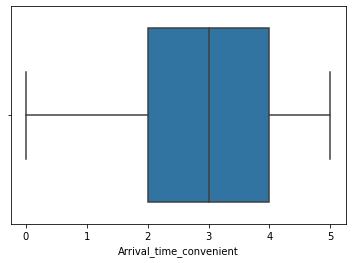

Description of Catering
---------------------------------------
count    94379.000000
mean         2.867078
std          1.376110
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Catering, dtype: float64
-------------------------------------
Distribution of Catering
---------------------------------------


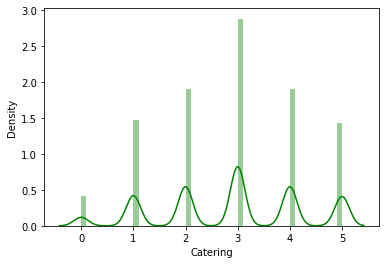

BoxPlot ofCatering
-----------------------------------------


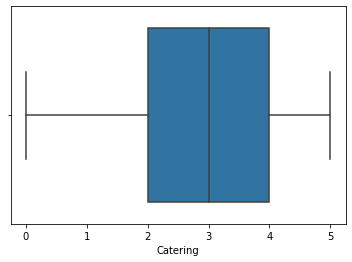

Description of Platform_location
---------------------------------------
count    94379.000000
mean         2.990867
std          1.308025
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Platform_location, dtype: float64
-------------------------------------
Distribution of Platform_location
---------------------------------------


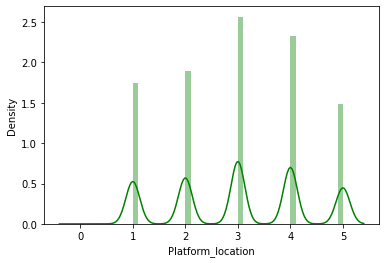

BoxPlot ofPlatform_location
-----------------------------------------


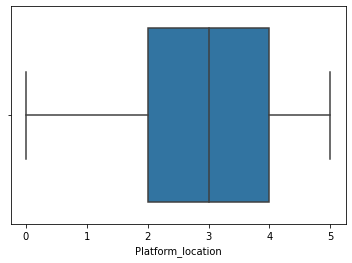

Description of Onboardwifi_service
---------------------------------------
count    94379.000000
mean         3.248466
std          1.319379
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Onboardwifi_service, dtype: float64
-------------------------------------
Distribution of Onboardwifi_service
---------------------------------------


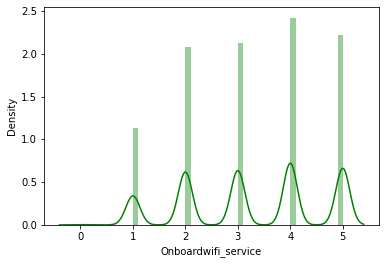

BoxPlot ofOnboardwifi_service
-----------------------------------------


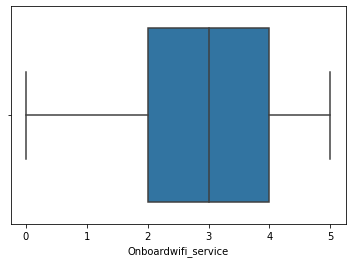

Description of Onboard_entertainment
---------------------------------------
count    94379.000000
mean         3.382627
std          1.346088
min          0.000000
25%          2.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: Onboard_entertainment, dtype: float64
-------------------------------------
Distribution of Onboard_entertainment
---------------------------------------


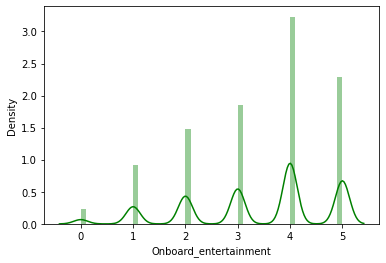

BoxPlot ofOnboard_entertainment
-----------------------------------------


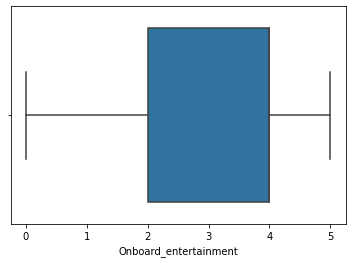

Description of Online_support
---------------------------------------
count    94379.000000
mean         3.519713
std          1.307628
min          0.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Online_support, dtype: float64
-------------------------------------
Distribution of Online_support
---------------------------------------


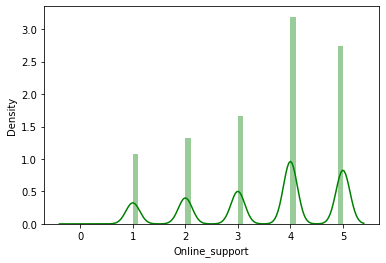

BoxPlot ofOnline_support
-----------------------------------------


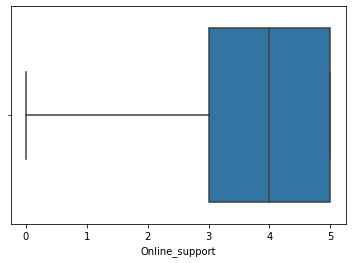

Description of Onlinebooking_Ease
---------------------------------------
count    94379.000000
mean         3.470518
std          1.305124
min          0.000000
25%          2.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Onlinebooking_Ease, dtype: float64
-------------------------------------
Distribution of Onlinebooking_Ease
---------------------------------------


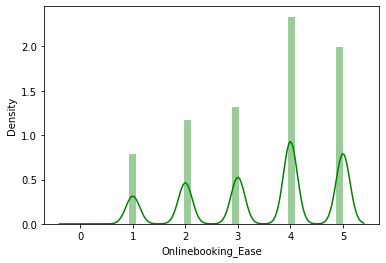

BoxPlot ofOnlinebooking_Ease
-----------------------------------------


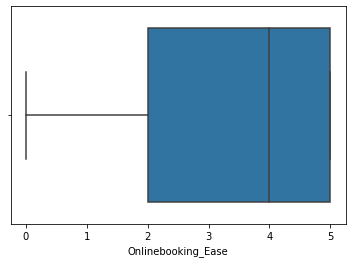

Description of Onboard_service
---------------------------------------
count    94379.000000
mean         3.513419
std          1.224912
min          0.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: Onboard_service, dtype: float64
-------------------------------------
Distribution of Onboard_service
---------------------------------------


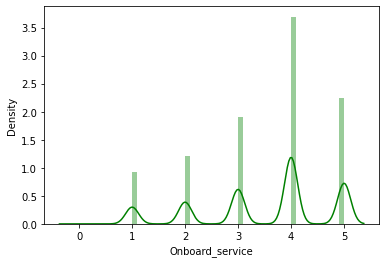

BoxPlot ofOnboard_service
-----------------------------------------


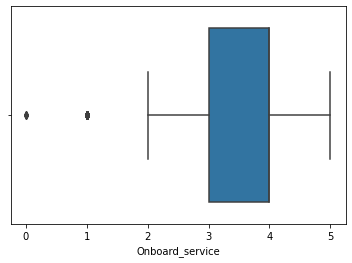

Description of Leg_room
---------------------------------------
count    94379.000000
mean         3.483487
std          1.291743
min          0.000000
25%          2.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Leg_room, dtype: float64
-------------------------------------
Distribution of Leg_room
---------------------------------------


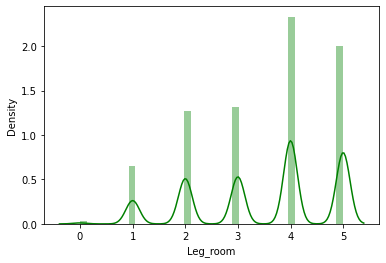

BoxPlot ofLeg_room
-----------------------------------------


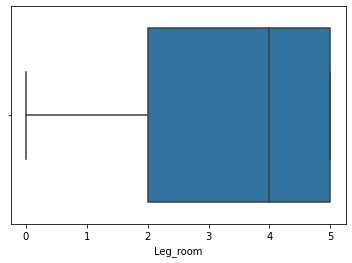

Description of Baggage_handling
---------------------------------------
count    94379.000000
mean         3.697242
std          1.155589
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Baggage_handling, dtype: float64
-------------------------------------
Distribution of Baggage_handling
---------------------------------------


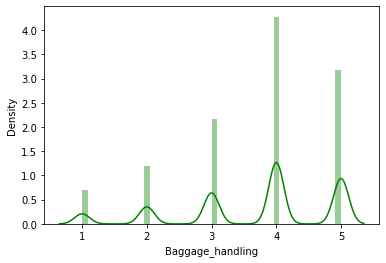

BoxPlot ofBaggage_handling
-----------------------------------------


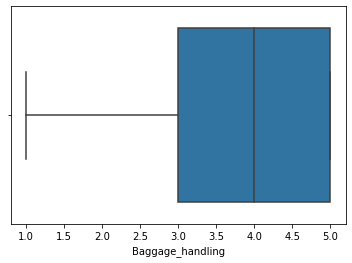

Description of Checkin_service
---------------------------------------
count    94379.000000
mean         3.342936
std          1.259933
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Checkin_service, dtype: float64
-------------------------------------
Distribution of Checkin_service
---------------------------------------


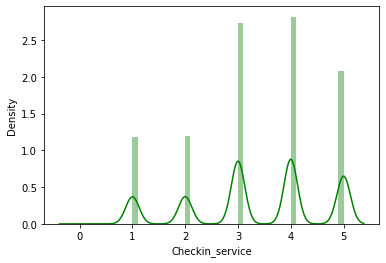

BoxPlot ofCheckin_service
-----------------------------------------


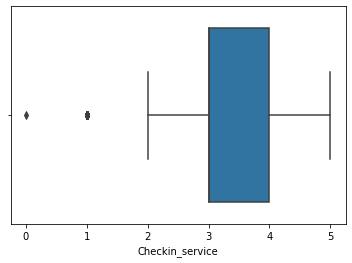

Description of Cleanliness
---------------------------------------
count    94379.000000
mean         3.704097
std          1.151954
min          0.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Cleanliness, dtype: float64
-------------------------------------
Distribution of Cleanliness
---------------------------------------


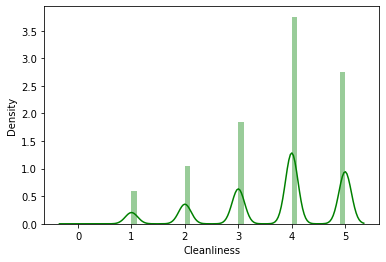

BoxPlot ofCleanliness
-----------------------------------------


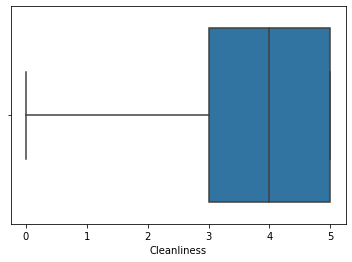

Description of Online_boarding
---------------------------------------
count    94379.000000
mean         3.351943
std          1.298030
min          0.000000
25%          2.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: Online_boarding, dtype: float64
-------------------------------------
Distribution of Online_boarding
---------------------------------------


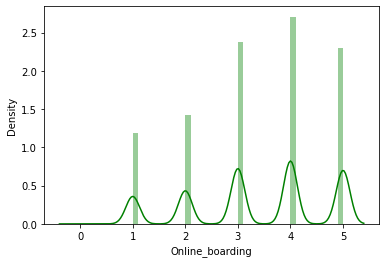

BoxPlot ofOnline_boarding
-----------------------------------------


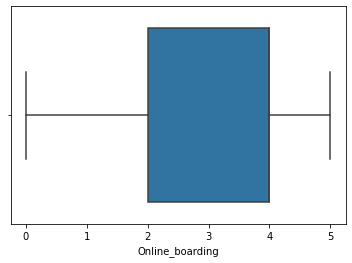

Description of Gender
---------------------------------------
count    94379.000000
mean         0.492557
std          0.499947
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Gender, dtype: float64
-------------------------------------
Distribution of Gender
---------------------------------------


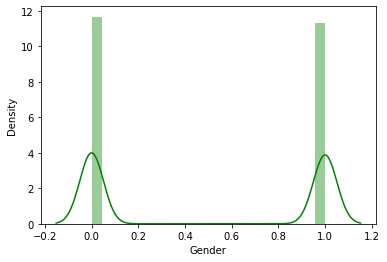

BoxPlot ofGender
-----------------------------------------


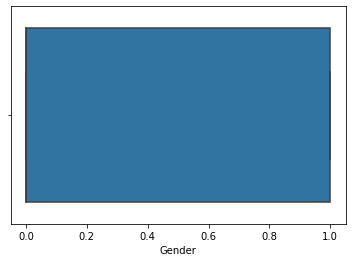

Description of CustomerType
---------------------------------------
count    94379.000000
mean         0.834656
std          0.371493
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: CustomerType, dtype: float64
-------------------------------------
Distribution of CustomerType
---------------------------------------


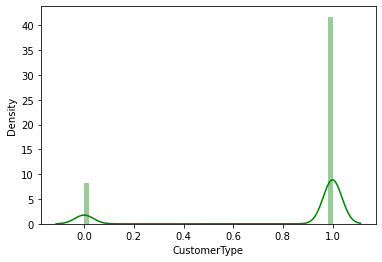

BoxPlot ofCustomerType
-----------------------------------------


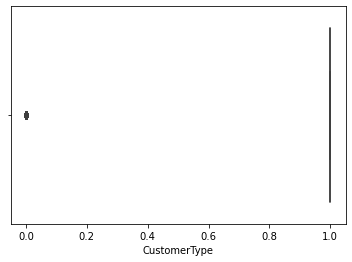

Description of TypeTravel
---------------------------------------
count    94379.000000
mean         0.718836
std          0.449570
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: TypeTravel, dtype: float64
-------------------------------------
Distribution of TypeTravel
---------------------------------------


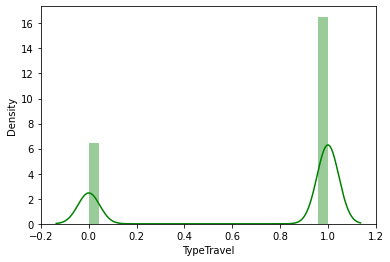

BoxPlot ofTypeTravel
-----------------------------------------


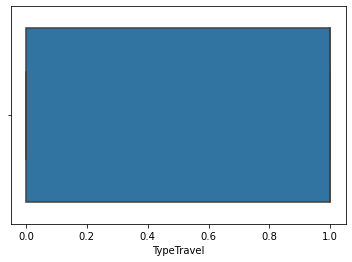

Description of Travel_Class
---------------------------------------
count    94379.000000
mean         0.477193
std          0.499482
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Travel_Class, dtype: float64
-------------------------------------
Distribution of Travel_Class
---------------------------------------


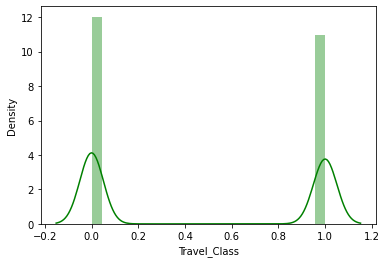

BoxPlot ofTravel_Class
-----------------------------------------


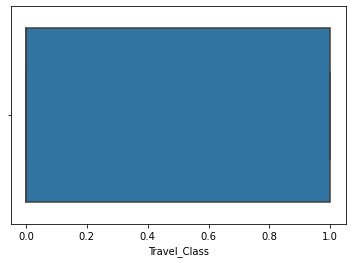

In [119]:
for x in listnumericcolumns:
    univariateAnalysis_numeric(x, 30)

In [120]:
df_train.columns

Index(['Overall_Experience', 'Age', 'Travel_Distance',
       'DepartureDelay_in_Mins', 'ArrivalDelay_in_Mins', 'Seat_comfort',
       'Seat_Class', 'Arrival_time_convenient', 'Catering',
       'Platform_location', 'Onboardwifi_service', 'Onboard_entertainment',
       'Online_support', 'Onlinebooking_Ease', 'Onboard_service', 'Leg_room',
       'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding',
       'Gender', 'CustomerType', 'TypeTravel', 'Travel_Class'],
      dtype='object')

## Pairplot

In [121]:
#sns.pairplot(df_train, hue = 'Overall_Experience',diag_kind='kde' );

## Proportion of Delighted customers:

In [122]:
df_train['Overall_Experience'].value_counts(normalize = True)

1    0.546658
0    0.453342
Name: Overall_Experience, dtype: float64

**0's and 1's are approimately in same proportions, So dataset is not a biased**

## Checking for Correlation

In [123]:
#plt.figure(figsize=(12,7))
#sns.heatmap(df_train.corr(), annot = True , fmt = '.2f');

In [124]:
# making copies of dataset
df_train_1 = df_train.copy()
df_train_2 = df_train.copy()

## Extracting the target column into separate vectors for training set and test set

In [125]:
X = df_train_1.drop('Overall_Experience', axis = 1)

y = df_train_1.pop('Overall_Experience')

## Splitting data into training and Validation set

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [127]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (66065, 23)
X_test (28314, 23)
y_train (66065,)
y_test (28314,)


## Logistic Regression

In [128]:
lr = LogisticRegression(random_state= 1)
lr.fit(X_train, y_train)

ytrain_predict = lr.predict(X_train)
print('Accuracy of Train data for Logistic Regression: ',accuracy_score(y_train, ytrain_predict))

ytest_predict = lr.predict(X_test)
print('Accuracy of Test data for Logistic Regression:' ,accuracy_score(y_test, ytest_predict))

Accuracy of Train data for Logistic Regression:  0.8316506470899871
Accuracy of Test data for Logistic Regression: 0.8319206046478774


# Applying GridSearchCV for Logistic Regression

In [129]:
grid={'penalty':['l1','l2','none'],
      'solver':['lbfgs', 'liblinear','newton-cg'],
      'max_iter':[1000,5000,10000,100000],
      'tol':[0.0001,0.000001]}

In [130]:
model = LogisticRegression(n_jobs=-1)

In [131]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5,n_jobs=-1,scoring='f1')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1), n_jobs=-1,
             param_grid={'max_iter': [1000, 5000, 10000, 100000],
                         'penalty': ['l1', 'l2', 'none'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg'],
                         'tol': [0.0001, 1e-06]},
             scoring='f1')

In [132]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 1e-06} 

LogisticRegression(max_iter=1000, n_jobs=-1, penalty='l1', solver='liblinear',
                   tol=1e-06)


In [133]:
LR = grid_search.best_estimator_

In [134]:
ytrain_predict = LR.predict(X_train)
display(accuracy_score(y_train, ytrain_predict))
ytest_predict = LR.predict(X_test)
display(accuracy_score(y_test, ytest_predict))

0.8316960569136457

0.8317793317793318

## Linear Discriminant Analysis - LDA

In [135]:
#Build LDA Model
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [136]:
pred_class_train = LDA.predict(X_train)
display(accuracy_score(y_train, pred_class_train))
pred_class_test = LDA.predict(X_test)
display(accuracy_score(y_test, pred_class_test))

0.8329372587603118

0.8322737868192414

## Naïve Bayes Model

In [137]:
# Build GaussianNB model
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [138]:
ytrain_predict_NB = NB_model.predict(X_train)
display(accuracy_score(y_train, ytrain_predict_NB))
ytest_predict_NB = NB_model.predict(X_test)
display(accuracy_score(y_test, ytest_predict_NB))

0.8161356240066601

0.8178639542275906

In [139]:
rf = RandomForestClassifier(n_estimators=220, max_depth= 20, max_features= 15, random_state = 1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features=15, n_estimators=220,
                       random_state=1)

In [140]:
ytrain_predict_rf = rf.predict(X_train)
display(accuracy_score(y_train, ytrain_predict_rf))
ytest_predict_rf = rf.predict(X_test)
display(accuracy_score(y_test, ytest_predict_rf))

0.996927268599107

0.9524969979515434

In [141]:
rf1 = RandomForestClassifier(n_estimators=300, max_depth= 20, max_features= 15, random_state = 1)
rf1.fit(X_train, y_train)
ytrain_predict_rf1 = rf1.predict(X_train)
display(accuracy_score(y_train, ytrain_predict_rf1))
ytest_predict_rf1 = rf1.predict(X_test)
display(accuracy_score(y_test, ytest_predict_rf1))

0.9968818587754484

0.9529914529914529

In [142]:
##-------Best model-------### 
df_test1 = df_test_num.copy()
prediction = rf1.predict(df_test)
df_test1['Overall_Experience'] = prediction
sample = df_test1[['ID', 'Overall_Experience']]
sample.to_csv('Prediction1.csv')

In [143]:
ada = AdaBoostClassifier(base_estimator=rf, n_estimators=22, learning_rate=0.1, random_state= 88)
ada.fit(X_train, y_train)
ytrain_predict_ada = ada.predict(X_train)
display(accuracy_score(y_train, ytrain_predict_ada))
ytest_predict_ada = ada.predict(X_test)
display(accuracy_score(y_test, ytest_predict_ada))

0.9988496178006508

0.9537684537684538

In [144]:
##-------Best model-------### 
df_test1 = df_test_num.copy()
prediction = ada.predict(df_test)
df_test1['Overall_Experience'] = prediction
sample = df_test1[['ID', 'Overall_Experience']]
sample.to_csv('Prediction2.csv')

In [145]:
ada1 = AdaBoostClassifier(base_estimator=rf1, n_estimators=32, learning_rate=0.1, random_state= 88)
ada1.fit(X_train , y_train)

ytrain_predict_ada1 = ada1.predict(X_train)
display(accuracy_score(y_train, ytrain_predict_ada1))
ytest_predict_ada1 = ada1.predict(X_test)
display(accuracy_score(y_test, ytest_predict_ada1))

0.9988344811927647

0.9539803630712722

In [146]:
LR = LogisticRegression(random_state = 1)

# Decision Tree model

In [147]:
dt = DecisionTreeClassifier(criterion = 'gini')
dt.fit(X_train , y_train)

DecisionTreeClassifier()

In [148]:
ytrain_predict_dt = dt.predict(X_train)
display(accuracy_score(y_train, ytrain_predict_dt))
ytest_predict_dt = dt.predict(X_test)
display(accuracy_score(y_test, ytest_predict_dt))

1.0

0.9283040192131101

In [149]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('D:\Courses\PGPDSBA\Hackathons\Bullet Train\ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()

In [150]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 25,min_samples_leaf=5,min_samples_split=15,random_state = 1)
reg_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=25, min_samples_leaf=5, min_samples_split=15,
                       random_state=1)

In [151]:
ytrain_predict_reg_dt_model = reg_dt_model.predict(X_train)
display(accuracy_score(y_train, ytrain_predict_reg_dt_model))
ytest_predict_reg_dt_model = reg_dt_model.predict(X_test)
display(accuracy_score(y_test, ytest_predict_reg_dt_model))

0.9646106107621282

0.9324362506180688

In [152]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

# Random Forest Classifier

In [153]:
rfcl = RandomForestClassifier(random_state=0,n_estimators=300,max_depth = 25,max_features = 15,n_jobs = -1 )
rfcl = rfcl.fit(X_train, y_train)
ytrain_predict_rfcl = rfcl.predict(X_train)
display(accuracy_score(y_train, ytrain_predict_rfcl))
ytest_predict_rfcl = rfcl.predict(X_test)
display(accuracy_score(y_test, ytest_predict_rfcl))

0.9994399455082116

0.9532033622942714

In [154]:
rf1 = RandomForestClassifier(n_estimators=280, max_depth= 25, 
                             max_features= 15, random_state = 0,
                             n_jobs = -1)


rf1.fit(X_train, y_train)
ytrain_predict_rf1 = rf1.predict(X_train)
display(accuracy_score(y_train, ytrain_predict_rf1))
ytest_predict_rf1 = rf1.predict(X_test)
display(accuracy_score(y_test, ytest_predict_rf1))

0.9994096722924393

0.9532739987285442

## Ada Boost

In [155]:
ada1 = AdaBoostClassifier(base_estimator=rf1, n_estimators=22, learning_rate=0.1, random_state= 0)

ada1.fit(X_train, y_train)
ytrain_predict_ada1 = ada1.predict(X_train)
display(accuracy_score(y_train, ytrain_predict_ada1))
ytest_predict_ada1 = ada1.predict(X_test)
display(accuracy_score(y_test, ytest_predict_ada1))

0.9997275410580488

0.954050999505545

In [156]:
df_test1 = df_test_num.copy()
prediction = ada1.predict(df_test)
df_test1['Overall_Experience'] = prediction
sample = df_test1[['ID', 'Overall_Experience']]
sample.to_csv('Prediction5.csv')

In [157]:
ada2 = AdaBoostClassifier(base_estimator=rf1, n_estimators=22, learning_rate=0.01, random_state= 0)

ada2.fit(X_train, y_train)
ytrain_predict_ada2 = ada2.predict(X_train)
display(accuracy_score(y_train, ytrain_predict_ada2))
ytest_predict_ada2 = ada2.predict(X_test)
display(accuracy_score(y_test, ytest_predict_ada2))

0.999379399076667

0.9535918626827717

In [158]:
df_test1 = df_test_num.copy()
prediction = ada2.predict(df_test)
df_test1['Overall_Experience'] = prediction
sample = df_test1[['ID', 'Overall_Experience']]
sample.to_csv('Prediction9.csv')

In [159]:
ada3 = AdaBoostClassifier(base_estimator=rf1, n_estimators=32, learning_rate=0.1, random_state= 0)

ada3.fit(X_train, y_train)
ytrain_predict_ada3 = ada3.predict(X_train)
display(accuracy_score(y_train, ytrain_predict_ada3))
ytest_predict_ada3 = ada3.predict(X_test)
display(accuracy_score(y_test, ytest_predict_ada3))

0.9997124044501627

0.9542982270254997

In [160]:
df_test1 = df_test_num.copy()
prediction = ada3.predict(df_test)
df_test1['Overall_Experience'] = prediction
sample = df_test1[['ID', 'Overall_Experience']]
sample.to_csv('Prediction6.csv')

In [161]:
ada4 = AdaBoostClassifier(base_estimator=rf1, n_estimators=32, learning_rate=1.0, random_state= 0)

ada4.fit(X_train, y_train)
ytrain_predict_ada4 = ada4.predict(X_train)
display(accuracy_score(y_train, ytrain_predict_ada4))
ytest_predict_ada4 = ada4.predict(X_test)
display(accuracy_score(y_test, ytest_predict_ada4))

0.9999545901763415

0.9541569541569541

In [162]:
ada5 = AdaBoostClassifier(base_estimator=rf1, n_estimators=22, learning_rate=1.0, random_state= 0)

ada5.fit(X_train, y_train)
ytrain_predict_ada5 = ada5.predict(X_train)
display(accuracy_score(y_train, ytrain_predict_ada5))
ytest_predict_ada5 = ada5.predict(X_test)
display(accuracy_score(y_test, ytest_predict_ada5))

0.9999545901763415

0.954227590591227

In [163]:
ada6 = AdaBoostClassifier(base_estimator=rf1, n_estimators=35, learning_rate=0.1, random_state= 0)

ada6.fit(X_train, y_train)
ytrain_predict_ada6 = ada6.predict(X_train)
display(accuracy_score(y_train, ytrain_predict_ada6))
ytest_predict_ada6 = ada6.predict(X_test)
display(accuracy_score(y_test, ytest_predict_ada6))

0.9997124044501627

0.9536624991170446

In [164]:
df_test1 = df_test_num.copy()
prediction = ada6.predict(df_test)
df_test1['Overall_Experience'] = prediction
sample = df_test1[['ID', 'Overall_Experience']]
sample.to_csv('Prediction8.csv')

In [165]:
ada7 = AdaBoostClassifier(base_estimator=rf1, n_estimators=35, learning_rate=1.0, random_state= 0)

ada7.fit(X_train, y_train)
ytrain_predict_ada7 = ada7.predict(X_train)
display(accuracy_score(y_train, ytrain_predict_ada7))
ytest_predict_ada7 = ada7.predict(X_test)
display(accuracy_score(y_test, ytest_predict_ada7))

0.9999394535684553

0.9539803630712722

In [166]:
df_test1 = df_test_num.copy()
prediction = ada7.predict(df_test)
df_test1['Overall_Experience'] = prediction
sample = df_test1[['ID', 'Overall_Experience']]
sample.to_csv('Prediction7.csv')

In [167]:
ada8 = AdaBoostClassifier(base_estimator=rf1, n_estimators=20, learning_rate=0.1, random_state= 0)

ada8.fit(X_train, y_train)
ytrain_predict_ada8 = ada8.predict(X_train)
display(accuracy_score(y_train, ytrain_predict_ada8))
ytest_predict_ada8 = ada8.predict(X_test)
display(accuracy_score(y_test, ytest_predict_ada8))

0.9996821312343904

0.9538390902027266

In [168]:
df_test1 = df_test_num.copy()
prediction = ada8.predict(df_test)
df_test1['Overall_Experience'] = prediction
sample = df_test1[['ID', 'Overall_Experience']]
sample.to_csv('Prediction10.csv')

In [169]:
ada9 = AdaBoostClassifier(base_estimator=rf1, n_estimators=18, learning_rate=0.1, random_state= 0)

ada9.fit(X_train, y_train)
ytrain_predict_ada9 = ada9.predict(X_train)
display(accuracy_score(y_train, ytrain_predict_ada9))
ytest_predict_ada9 = ada9.predict(X_test)
display(accuracy_score(y_test, ytest_predict_ada9))

0.9997124044501627

0.9540156812884085

In [170]:
rf1 = RandomForestClassifier(n_estimators=280, max_depth= 25, 
                             max_features= 15, random_state = 0,
                             n_jobs = -1)
rf1.fit(X_train, y_train)
ytrain_predict_rf1 = rf1.predict(X_train)
display(accuracy_score(y_train, ytrain_predict_rf1))
ytest_predict_rf1 = rf1.predict(X_test)
display(accuracy_score(y_test, ytest_predict_rf1))

0.9994096722924393

0.9532739987285442

In [171]:
rf2 = RandomForestClassifier(n_estimators=270, max_depth= 25, 
                             max_features= 15, random_state = 0,
                             n_jobs = -1)


rf2.fit(X_train, y_train)
ytrain_predict_rf2 = rf2.predict(X_train)
display(accuracy_score(y_train, ytrain_predict_rf2))
ytest_predict_rf2 = rf2.predict(X_test)
display(accuracy_score(y_test, ytest_predict_rf2))

0.9994096722924393

0.9533799533799534

In [172]:
rf3 = RandomForestClassifier(n_estimators=270, max_depth= 25, 
                             max_features= 13, random_state = 0,
                             n_jobs = -1)
rf3.fit(X_train, y_train)
ytrain_predict_rf3 = rf3.predict(X_train)
display(accuracy_score(y_train, ytrain_predict_rf3))
ytest_predict_rf3 = rf3.predict(X_test)
display(accuracy_score(y_test, ytest_predict_rf3))

0.9993339892530084

0.9538037719855902

In [173]:
df_test1 = df_test_num.copy()
prediction = rf3.predict(df_test)
df_test1['Overall_Experience'] = prediction
sample = df_test1[['ID', 'Overall_Experience']]
sample.to_csv('Prediction13.csv')

In [174]:
rf4 = RandomForestClassifier(n_estimators=270, max_depth= 25, 
                             max_features= 13, random_state = 0,
                             min_samples_leaf = 2 , min_samples_split = 2,
                             n_jobs = -1)


rf4.fit(X_train, y_train)
ytrain_predict_rf4 = rf4.predict(X_train)
display(accuracy_score(y_train, ytrain_predict_rf4))
ytest_predict_rf4 = rf4.predict(X_test)
display(accuracy_score(y_test, ytest_predict_rf4))

0.9956860667524408

0.9517906336088154

In [175]:
df_test1 = df_test_num.copy()
prediction = rf4.predict(df_test)
df_test1['Overall_Experience'] = prediction
sample = df_test1[['ID', 'Overall_Experience']]
sample.to_csv('Prediction14.csv')

In [176]:
ada10 = AdaBoostClassifier(base_estimator=rf3, n_estimators=25, learning_rate=0.25, random_state= 0)

ada10.fit(X_train, y_train)
ytrain_predict_ada10 = ada10.predict(X_train)
display(accuracy_score(y_train, ytrain_predict_ada10))
ytest_predict_ada10 = ada10.predict(X_test)
display(accuracy_score(y_test, ytest_predict_ada10))

0.9997124044501627

0.9539097266369994

In [177]:
df_test1 = df_test_num.copy()
prediction = ada10.predict(df_test)
df_test1['Overall_Experience'] = prediction
sample = df_test1[['ID', 'Overall_Experience']]
sample.to_csv('Prediction12.csv')